# 투자자들 전체에 대한 EDA 
---

개인 투자자 들의 투자 한 회사 들과의 관계 그리고 그 투자자들의 돈의 (동학) 을 보이는 것 

개인 투자자의 성향에 따라 무엇을 볼 수 있는가 확인하는것 


크런치 베이스의 url 이 응답하는지 체크해야한다.  `2021 년 도 논문에서 이에 대해서 홈페이지가 남아 있지 않으면 http 200이 아니면 이에 대해서 없는 것으로 판단하기로했다고한다. 
그래프 x 축은 기업이 설립된 연도로부터, y축은 응답하는 회사 비율 및 갯 수 비교 이것은 Fielding and Reschke2014년도에 했던 방법론임. 


통계적 분석으로 EDA로 돌아간것은 아래와 같다. 
- Small and medium enterprise들에 대한 것 카테고리를 통해서 시대를 통해서 급격히 성장했다고 한다. 
- 나라별로  컴퍼니의 갯 수 가리기 
- companies per million imhabitants 인 나라들 개수 파악 하기 . 
- 시간대별로 국가에 분포하는 점으로 나타내기 스타트업들  지도에 분포 하는 것 
- 크런치 베이스 데이터 가 생성된 날짜 인 1066년부터 2023년도의 데이터를 가지고 있는데 우리 데이터는 어디 범주인지 데이터 피처 엔지니어링 하기 ,(HM treasury 라는데요 , )
- 선행연구에서는 1995년부터 2015년까지를 기준으로 했다. 
- 왜냐면 그 2015년에서 2020년에 있는 회사들 assign 하기에는 not be able하기 때문이다. 
- 성공의 기준이 무엇이냐고 할떄  논문에서는 acquired ipo 상태 이거나 operating 이면서 시리즈 b 인상태로 수렴할떄를 기준으로 하였다.

 



In [1]:
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt

아래와 같이 우리는 테이블을 정의합니다. 데이터베이스는 현재 연구일 기준으로 3월 까지의 크런치 베이스 데이터 셋을 bulk 데이터로 권한을 통해 받은 경우로 셈을 하였습니다. 

In [2]:
path = "/home/users/JunhaPark/crunchbase/crunchbase_data_files/bulk_export/"
os.listdir(path)

['events.csv',
 'event_appearances.csv',
 'organization_descriptions.csv',
 'people_descriptions.csv',
 'ipos.csv',
 'investment_partners.csv',
 'degrees.csv',
 'people.csv',
 'funds.csv',
 'acquisitions.csv',
 'investors.csv',
 'investments.csv',
 'funding_rounds.csv',
 'organizations.csv',
 'org_parents.csv',
 'jobs.csv',
 'category_groups.csv']

이번주에는 3가지 형태의 투자자들에 대한 이해 를 위해서 투자자 자체를 가지고 이야기하고자합니다. 

투자자는 기관 투자자와 개인 투자자 그리고 한국의 산학협력단과 같이 대학에서 투자하는 경우가 있씁니다. 

이중에서 데이터 베이스 같으

# ORGa 

org 에 대한 분석입니다. 
organization은 투자자와 학교 그리고 

organization은 기본적으로 해야하는 지표를 정해야합니다. 
따라 
저희는 아래 컬럼들을 EDA 하였습니다. 

organization은 다른 모든 회사들의 존재를 다 한번에 가지고 있는 곳이며,진행하는 것이 있습니다. 

현재 org 테이블에서 추출하여햐 하는 정보는 , 
기업을 지역의 관계를 대변하는 지리적 특성인 country_code, state_code, region, city  추가로 address와 postal code를 통하여 sankey diagam 을 통해서 이해하고자 합니다.   

또한 category list와 category groups list를 통해  그룹의 속성을 파악하고자 합니다.  이는 category table과 관련이 있습니다. 


이후 num funding rounds와 total funding usd ,  total funding , total funding currency code를 가지고  기관이 얼마나 돈을 받았는지 확인하고 자합니다. 

founded on , last funding on closed on 을 통해 
기업의 설립 마지막 투자일 그리고 종료일을 통하여 그 기업의 생성과 소멸을 보고자 함이며, 이는 시계열 분석과 함께 시장의 상황을 나중에 aggregate 하여 보고자 합니다. 


employee  수를 통해 기업의 인력의 견인을 살펴볼수 있습니다. 

또한 primary role을 통해서 회사가 현재 어떤 위치를 차지한다고 생각하고 있는지 확인할 수 있습니다. 


이와 org의  org parent table에서 자회사의 형태를 확인할 수 있으며 종속관계를 확인할 수 있습니다. 반향성이 있습니다. 네트워크 분석 방향 그래프 그려볼 수 있습니다. 


또한 role의 형태에서 ipo의 형태의 테이블 과 acuqsision의 형태인 것으로 그 인수 협ㅇㅇ이 이루어진것들에 대해서 확인하여 누가 누구를 샀는지를 확인할수 있습니다. 
이때 벡터의 컴포넌트는 시간, 가격, 등입니다. 

ipo에서는 상장을 한 기업 에 정보를 좀더 반영할 가능성을 시사합니다. 이는 ipo가 된 기업이 얼마를 받았는지를 알 수 있는 투자자와 아닌 기업을 연결해주는 매개체입니다. 




In [5]:
path+'organization.csv'

'/home/users/JunhaPark/crunchbase/crunchbase_data_files/bulk_export/organization.csv'

In [3]:
org_df =pd.read_csv(path+'organizations.csv')

In [6]:
org_df['roles'].value_counts().index


Index(['company', 'investor', 'investor,company', 'school', 'company,investor',
       'company,school', 'investor,school', 'investor,company,school',
       'school,company', 'school,investor', 'company,investor,school',
       'school,investor,company'],
      dtype='object')

In [6]:
org_df.index

RangeIndex(start=0, stop=2650088, step=1)

In [7]:
org_df.shape

(2650088, 41)

In [8]:
org_df.dtypes.value_counts()

object     36
float64     5
dtype: int64

In [9]:
org_eda_df =org_df[["uuid","name",'num_exits',"type","roles","domain","homepage_url","country_code","state_code","region","city","category_list","num_funding_rounds","total_funding_usd","founded_on","last_funding_on","closed_on","employee_count","primary_role"]]

In [10]:
org_eda_df.head()

,uuid,name,num_exits,type,roles,domain,homepage_url,country_code,state_code,region,city,category_list,num_funding_rounds,total_funding_usd,founded_on,last_funding_on,closed_on,employee_count,primary_role
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,NaN,organization,company,wetpaint.com,http://www.wetpaint.com/,USA,NY,New York,New York,"Publishing,Social Media,Social Media Management",3.0,3.975000e+07,2005-06-01,2008-05-19,NaN,51-100,company
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,2.0,organization,"investor,company",zoho.com,https://www.zoho.com,USA,CA,California,Pleasanton,"Cloud Computing,Collaboration,Developer Tools,...",NaN,NaN,1996-03-17,NaN,NaN,10000+,company
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,NaN,organization,company,digg.com,http://www.digg.com,USA,NY,New York,New York,"Internet,Social Media,Social Network",6.0,4.900000e+07,2004-10-11,2016-09-13,NaN,51-100,company
3,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,55.0,organization,"investor,company",omidyar.com,http://www.omidyar.com,USA,CA,California,Redwood City,"Enterprise Software,Financial Services,Venture...",NaN,NaN,2004-01-01,NaN,NaN,101-250,investor
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,1.0,organization,"investor,company",meta.com,https://meta.com,USA,CA,California,Menlo Park,"Augmented Reality,Social Media,Social Network,...",17.0,2.612282e+10,2004-02-04,2022-08-04,NaN,10000+,company


In [11]:
#org_eda_df.sort_values(by='founded_on')
org_eda_df['founded_on'].value_counts().sort_index()

1000-01-01     4
1000-12-01     1
1001-01-01     1
1007-01-01     1
1011-01-01     1
              ..
2023-02-27     7
2023-02-28     2
2023-03-01    13
2023-03-02     5
2023-03-04     1
Name: founded_on, Length: 27156, dtype: int64

<Axes: title={'center': 'founded on date top 10'}, xlabel='numbers'>

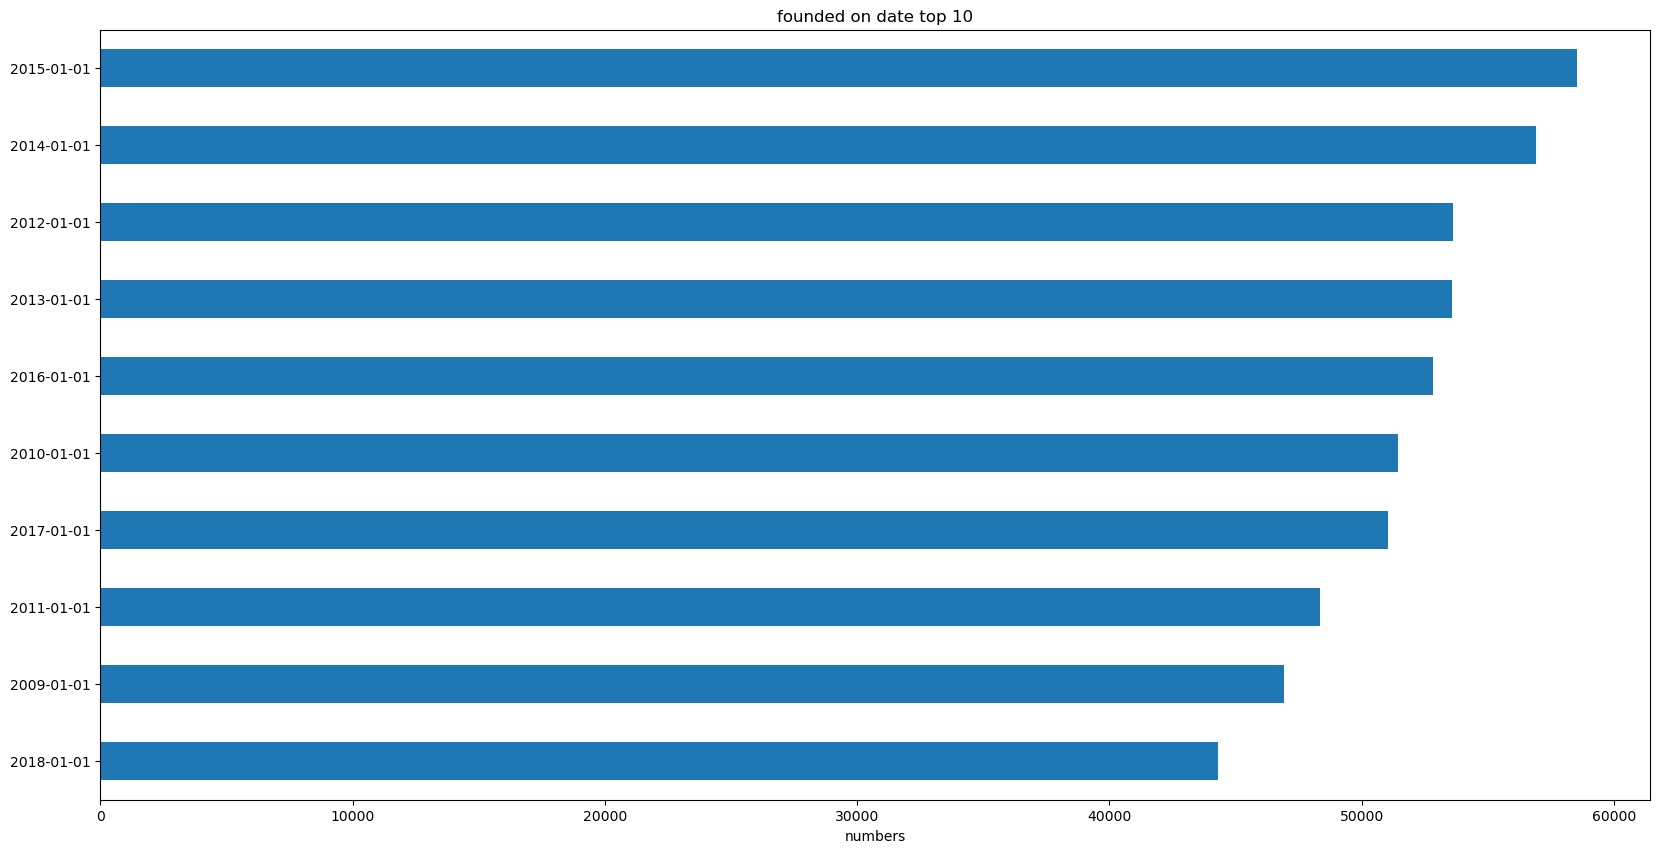

In [12]:
(org_eda_df['founded_on']
    .value_counts(ascending=False)[0:10][::-1]
    .plot(kind='barh', 
          figsize=(20,10), 
          title="founded on date top 10", 
          xlabel='numbers')
)

In [13]:
# 가업들이 언제 연도별로 계산 

# 기업들이 얹

In [14]:
org_eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2650088 entries, 0 to 2650087
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   uuid                object 
 1   name                object 
 2   num_exits           float64
 3   type                object 
 4   roles               object 
 5   domain              object 
 6   homepage_url        object 
 7   country_code        object 
 8   state_code          object 
 9   region              object 
 10  city                object 
 11  category_list       object 
 12  num_funding_rounds  float64
 13  total_funding_usd   float64
 14  founded_on          object 
 15  last_funding_on     object 
 16  closed_on           object 
 17  employee_count      object 
 18  primary_role        object 
dtypes: float64(3), object(16)
memory usage: 384.2+ MB


<Axes: ylabel='num_funding_rounds'>

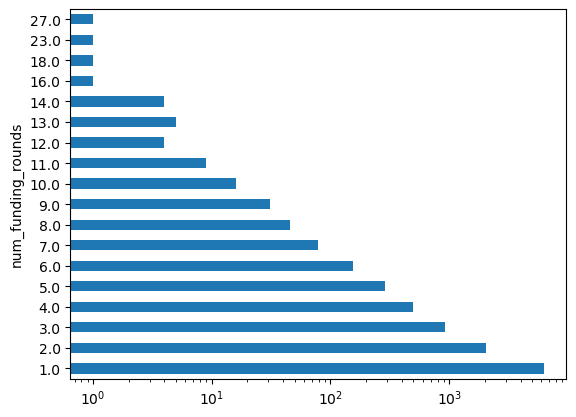

In [15]:
# 문닫은 기업들 
org_eda_df[org_eda_df['closed_on'].notna()].groupby(['num_funding_rounds']).count()['uuid'].plot(kind='barh',logx=True)


<Axes: ylabel='num_funding_rounds'>

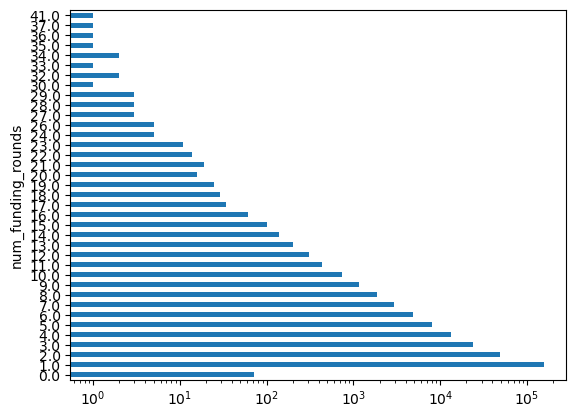

In [16]:
org_eda_df[org_eda_df['closed_on'].isna()].groupby(['num_funding_rounds']).count()['uuid'].plot(kind='barh',logx=True)

<Axes: title={'center': 'organization country top 20'}, xlabel='numbers'>

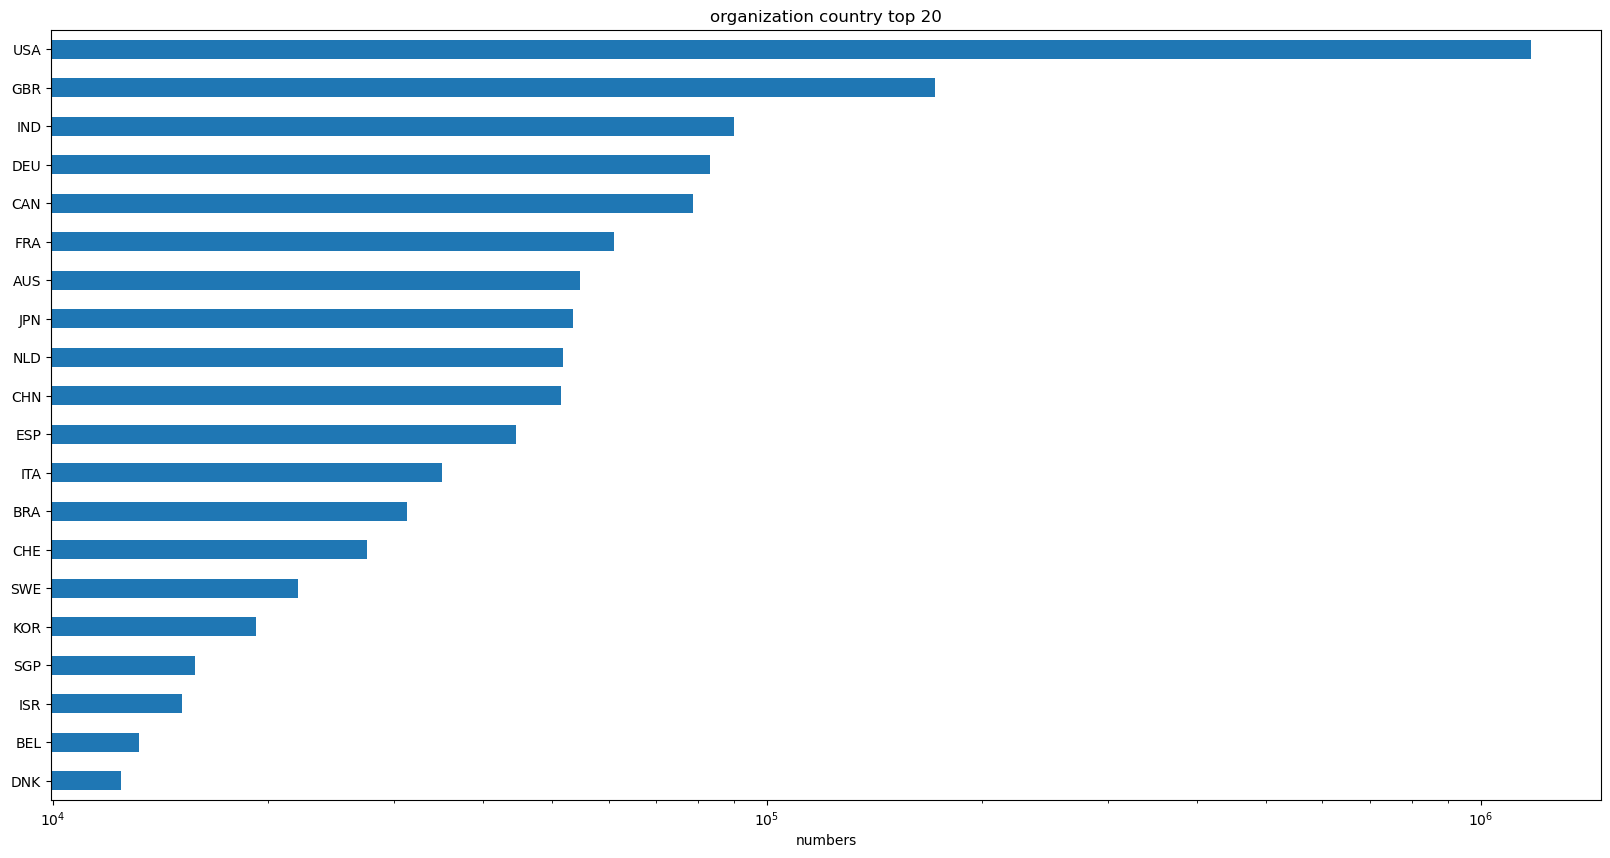

In [17]:
(org_df['country_code']
    .value_counts(ascending=False)[0:20][::-1]
    .plot(kind='barh', 
          figsize=(20,10), 
          title="organization country top 20", 
          logx=True, 
          xlabel='numbers')
)

<Axes: title={'center': 'organization region top 20'}, xlabel='numbers'>

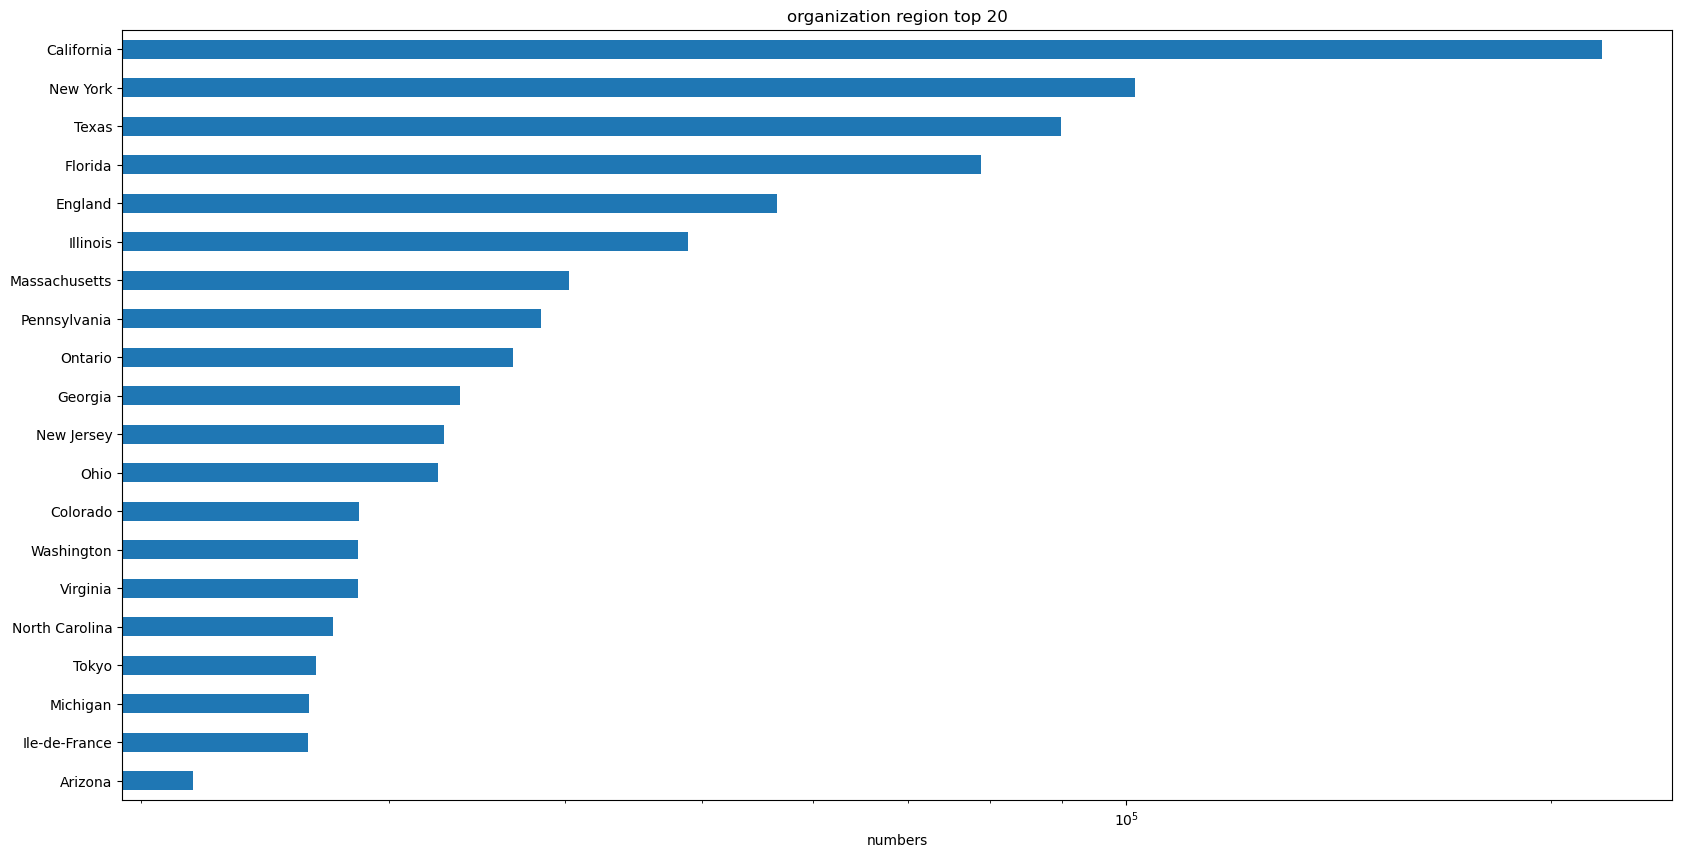

In [18]:
(org_df['region']
    .value_counts(ascending=False)[0:20][::-1]
    .plot(kind='barh', 
          figsize=(20,10), 
          title="organization region top 20", 
          logx=True, 
          xlabel='numbers')
)

<Axes: title={'center': 'organization city top 20'}, xlabel='numbers'>

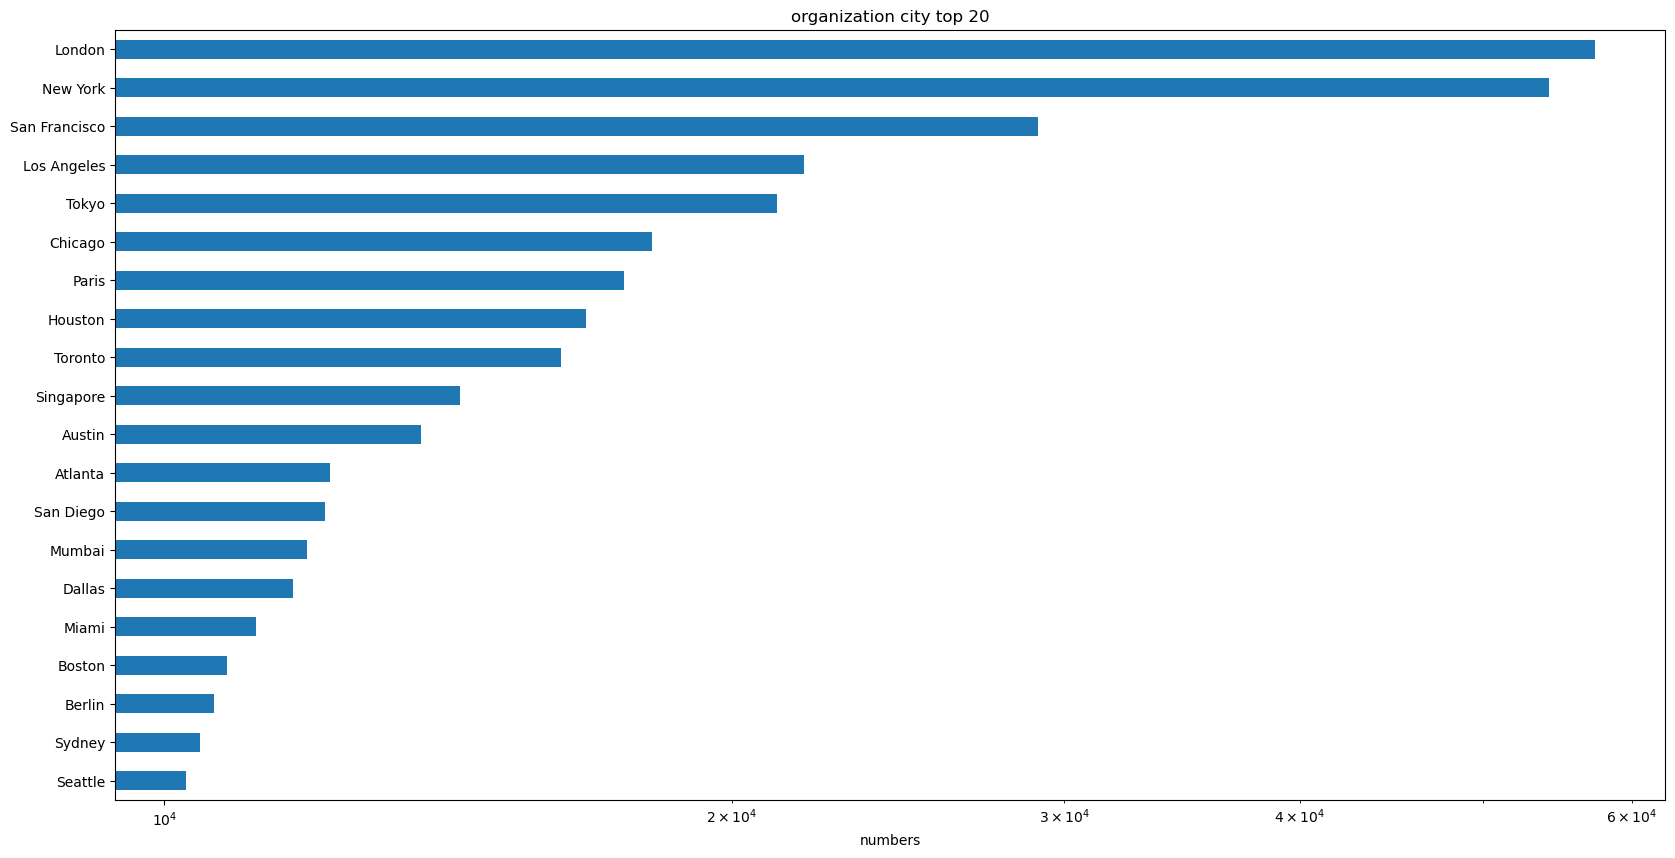

In [19]:
(org_df['city']
    .value_counts(ascending=False)[0:20][::-1]
    .plot(kind='barh', 
          figsize=(20,10), 
          title="organization city top 20", 
          logx=True, 
          xlabel='numbers')
)

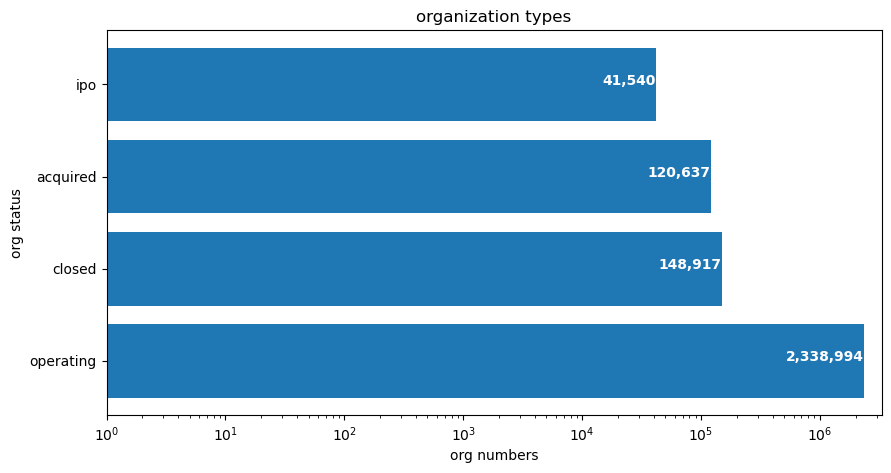

In [20]:
temp_x=org_df['status'].value_counts().keys()
temp_y=org_df['status'].value_counts().values 
plt.figure(figsize=(10,5))
plt.barh(temp_x, temp_y)
plt.xscale('log')
plt.xlim(1, 3300_000)
plt.title('organization types')
plt.xlabel('org numbers')
plt.ylabel('org status')

for i, v in enumerate(temp_y):
    plt.text(v  ,i, f"{v:,}", color= 'w', fontweight='bold', ha='right')
    


In [21]:
org_df['roles'].value_counts().to_frame()

,roles
company,2491532
investor,54716
"investor,company",34483
school,19655
"company,investor",7844
"company,school",1000
"investor,school",334
"investor,company,school",131
"school,company",72
"school,investor",40


In [22]:
org_df['num_funding_rounds'].isnull().sum()

2376608

In [23]:
org_df['num_funding_rounds'].value_counts().sum()

273480

In [24]:
org_df[['name','num_funding_rounds']].sort_values(by='num_funding_rounds',ascending=False)[:20]['name'].values

array(['Artaic', 'Tesla', 'Optimus Technologies', 'Plug Power', 'SpaceX',
       'Grab', 'Klarna', 'Uber', 'Zero Motorcycles', 'Airbnb',
       'HelixNano', 'Ola', 'Sirios Resources', 'Robinhood', 'Aye Finance',
       'Trendy Beat Network', 'BYJU’S', 'Palantir Technologies', 'KILTR',
       'Lyft'], dtype=object)

In [25]:
org_df[['name','num_funding_rounds']].sort_values(by='num_funding_rounds',ascending=False)[:20]['num_funding_rounds'].values


array([41., 37., 36., 35., 34., 34., 33., 32., 32., 30., 29., 29., 29.,
       28., 28., 28., 27., 27., 27., 27.])

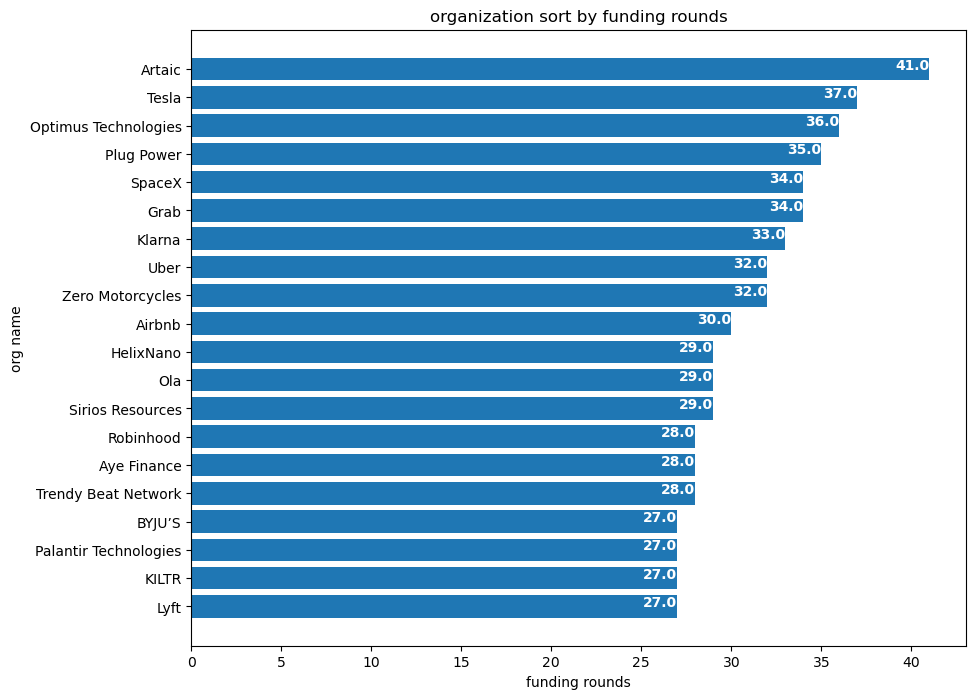

In [26]:

temp_x=org_df[['name','num_funding_rounds']].sort_values(by='num_funding_rounds',ascending=False)[:20]['name'].values[::-1]
temp_y=org_df[['name','num_funding_rounds']].sort_values(by='num_funding_rounds',ascending=False)[:20]['num_funding_rounds'].values[::-1]
plt.figure(figsize=(10,8))
plt.barh(temp_x, temp_y)
#plt.xscale('log')
#plt.xlim(1, 3300_000)
plt.title('organization sort by funding rounds')
plt.xlabel('funding rounds')
plt.ylabel('org name')

for i, v in enumerate(temp_y):
    plt.text(v  ,i, f"{v:,}", color= 'w', fontweight='bold', ha='right')

In [27]:
org_df['total_funding_usd'].isnull().sum()

2376679

In [28]:
org_df['total_funding_usd'].value_counts()

0.0          75822
100000.0      3296
1000000.0     3116
500000.0      2410
50000.0       2267
             ...  
6791754.0        1
9336595.0        1
8889551.0        1
65192.0          1
1506673.0        1
Name: total_funding_usd, Length: 91868, dtype: int64

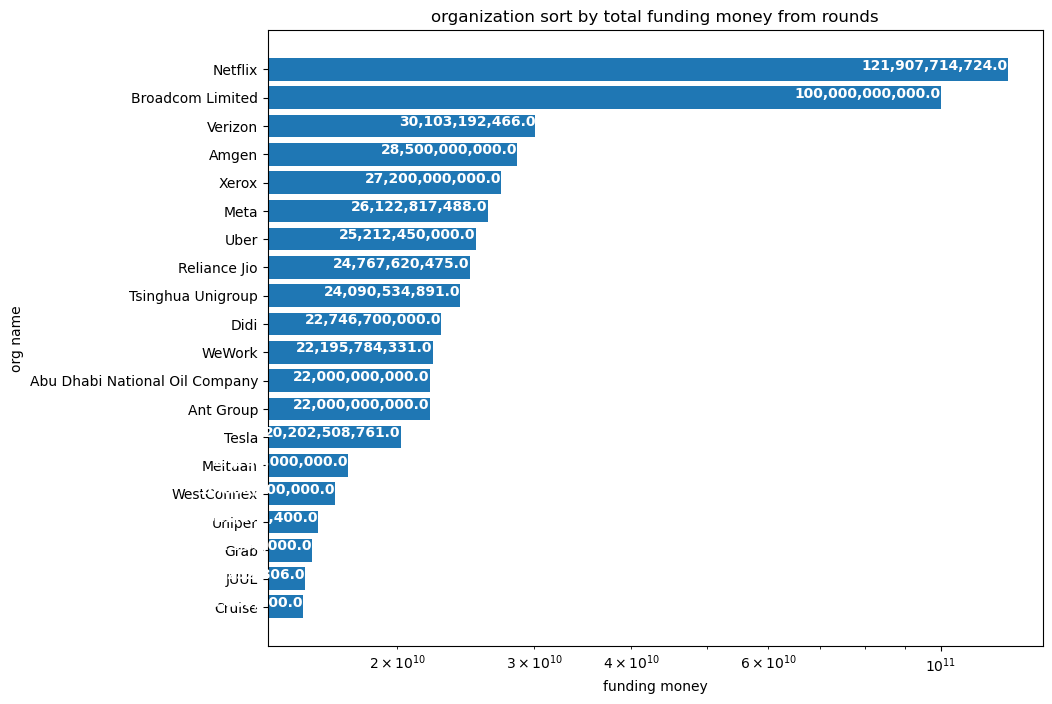

In [29]:
temp_x=org_df[['name','total_funding_usd']].sort_values(by='total_funding_usd',ascending=False)[:20]['name'].values[::-1]
temp_y=org_df[['name','total_funding_usd']].sort_values(by='total_funding_usd',ascending=False)[:20]['total_funding_usd'].values[::-1]
plt.figure(figsize=(10,8))
plt.barh(temp_x, temp_y)
plt.xscale('log')
#plt.xlim(1, 3300_000)
plt.title('organization sort by total funding money from rounds')
plt.xlabel('funding money')
plt.ylabel('org name')

for i, v in enumerate(temp_y):
    plt.text(v  ,i, f"{v:,}", color= 'w', fontweight='bold', ha='right')


<Axes: >

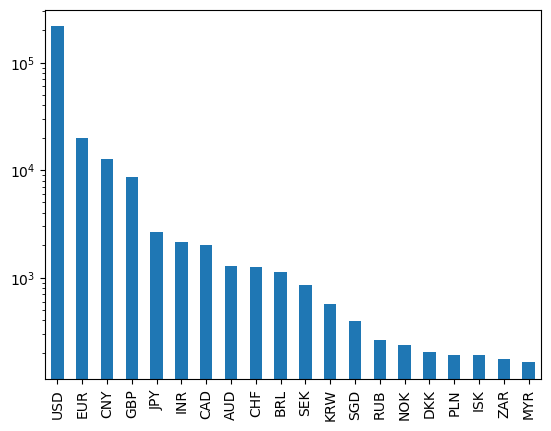

In [30]:
org_df['total_funding_currency_code'].value_counts()[:20].plot(kind='bar',logy=True)

In [37]:
org_df['founded_on']

0          2005-06-01
1          1996-03-17
2          2004-10-11
3          2004-01-01
4          2004-02-04
              ...    
2650083           NaN
2650084    1988-01-01
2650085           NaN
2650086    2018-02-02
2650087    2022-01-01
Name: founded_on, Length: 2650088, dtype: object

In [33]:
org_df['founded_on_datetime'] = pd.to_datetime(org_df['founded_on'],errors='coerce')

In [66]:
org_df['founded_on_datetime'].dt.year.value_counts().sort_index(ascending=False)

2023.0      873
2022.0    15846
2021.0    35412
2020.0    49580
2019.0    57454
          ...  
1682.0        6
1681.0        3
1680.0        1
1679.0        2
1678.0        2
Name: founded_on_datetime, Length: 345, dtype: int64

In [42]:
org_df['raw_founded_year'] = org_df['founded_on'].str.split('-').str[0]
#merging_invest_person['funding_stage_company'] = merging_invest_person.funding_round_name.str.split(' - ').str[1] 

Text(0, 0.5, 'org count')

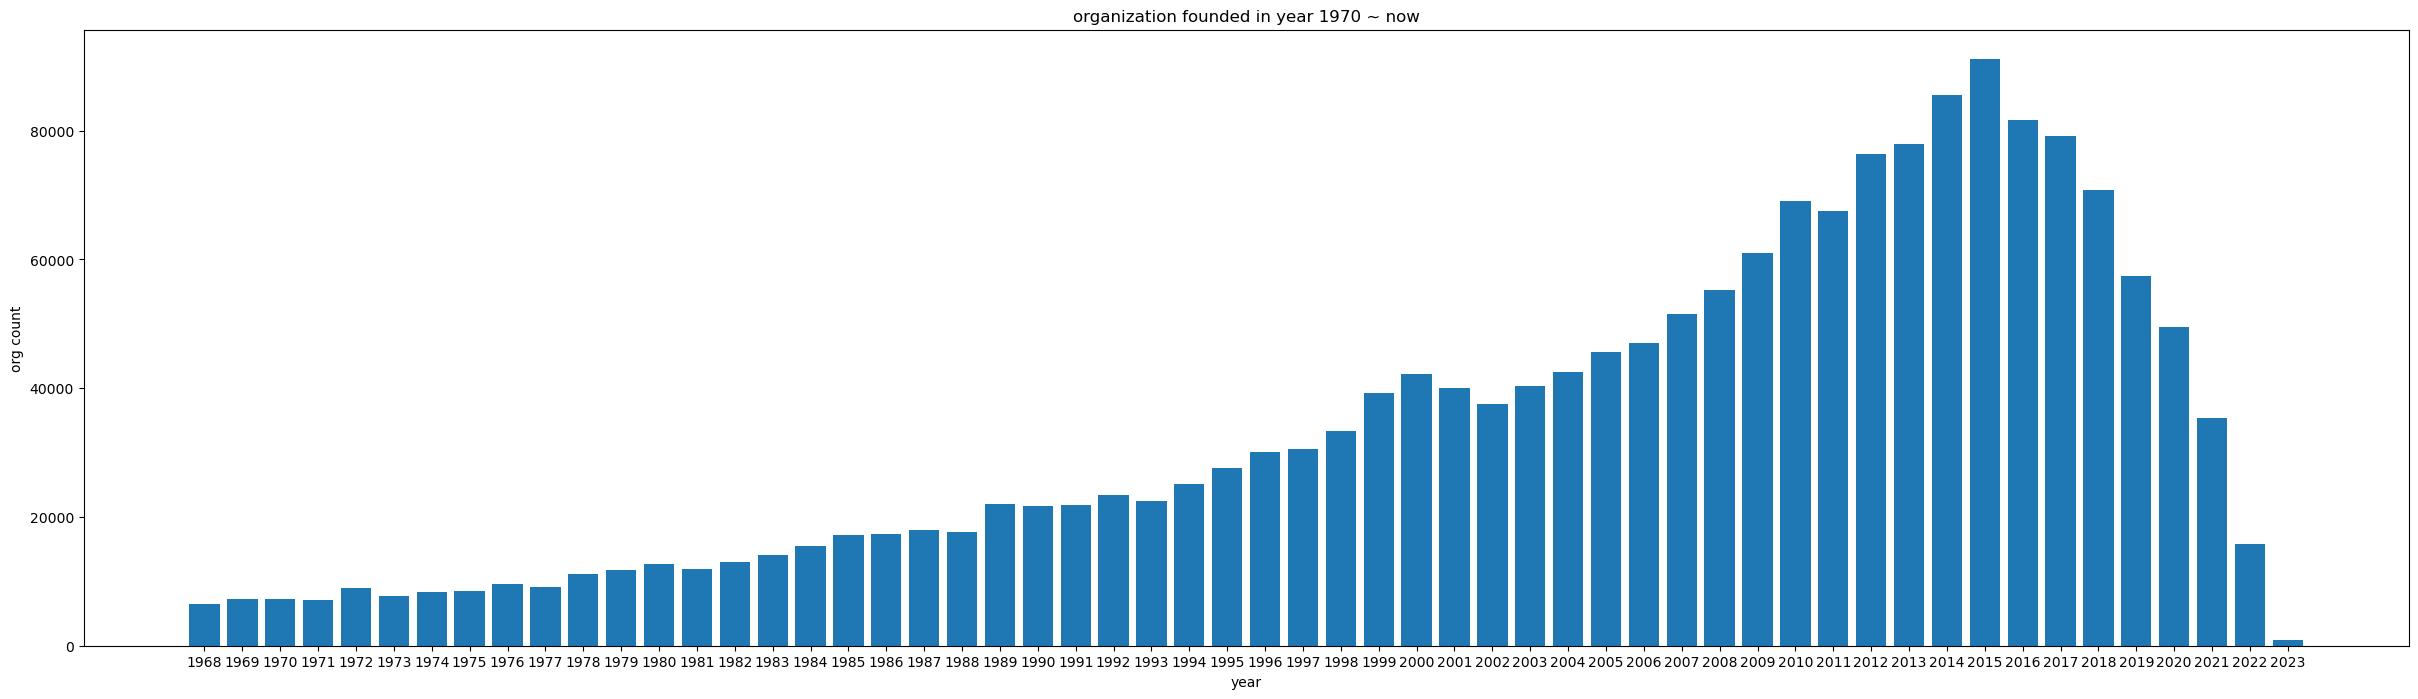

In [87]:
temp_x =  org_df['raw_founded_year'].value_counts().sort_index(ascending=False)[:56].keys()[::-1]
temp_y = org_df['raw_founded_year'].value_counts().sort_index(ascending=False)[:56].values[::-1]

plt.figure(figsize=(30,8))
plt.bar(temp_x, temp_y)
#plt.xscale('log')
#plt.xlim(1, 3300_000)
plt.title('organization founded in year 1970 ~ now')
plt.xlabel('year')
plt.ylabel('org count')


last funding on 기업 수

In [88]:
org_df['raw_last_funding_year'] = org_df['last_funding_on'].str.split('-').str[0]

In [90]:
org_df['raw_last_funding_year'].value_counts().sort_index(ascending=False)[:50].keys()[::-1]

Index(['1963', '1969', '1970', '1976', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [92]:
org_df['raw_last_funding_year'].value_counts().sort_index(ascending=False)[:50]

2023     6136
2022    43324
2021    34712
2020    22741
2019    23337
2018    23047
2017    19595
2016    18292
2015    17615
2014    14582
2013    10952
2012     7669
2011     6031
2010     4798
2009     3468
2008     3077
2007     2741
2006     1922
2005     1353
2004     1040
2003      874
2002      804
2001     1004
2000     2715
1999      597
1998      206
1997      146
1996      168
1995       92
1994       57
1993       52
1992       48
1991       35
1990       39
1989        8
1988       11
1987       20
1986       23
1985       11
1984        9
1983        8
1982       11
1981        4
1980        6
1979        4
1978        1
1976        2
1970        2
1969        1
1963        1
Name: raw_last_funding_year, dtype: int64

Text(0, 0.5, 'org count')

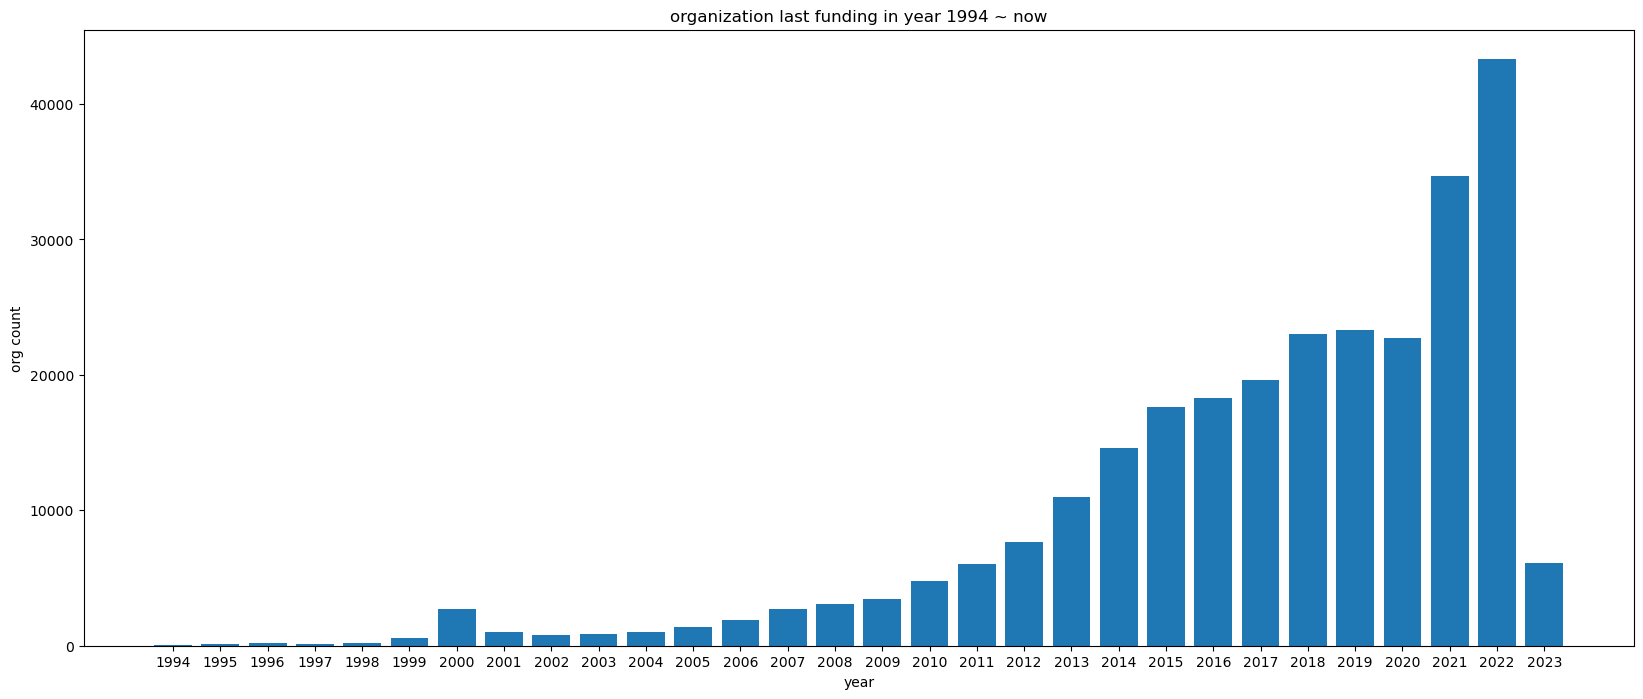

In [99]:
temp_x =  org_df['raw_last_funding_year'].value_counts().sort_index(ascending=False)[:30].keys()[::-1]
temp_y = org_df['raw_last_funding_year'].value_counts().sort_index(ascending=False)[:30].values[::-1]

plt.figure(figsize=(20,8))
plt.bar(temp_x, temp_y)
#plt.xscale('log')
#plt.xlim(1, 3300_000)
plt.title('organization last funding in year 1994 ~ now')
plt.xlabel('year')
plt.ylabel('org count')

기업이 닫은 경우 closed on을 기준으로 확인할 수 있다. 
그러나 정확하진 않은 추론이다. 

In [101]:
org_df['yearof_closed_on'] = org_df['closed_on'].str.split('-').str[0]

In [102]:
org_df['yearof_closed_on'].value_counts().sort_index(ascending=False)[:50].keys()[::-1]

Index(['1970', '1971', '1972', '1974', '1975', '1976', '1978', '1979', '1981',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

Text(0, 0.5, 'org count')

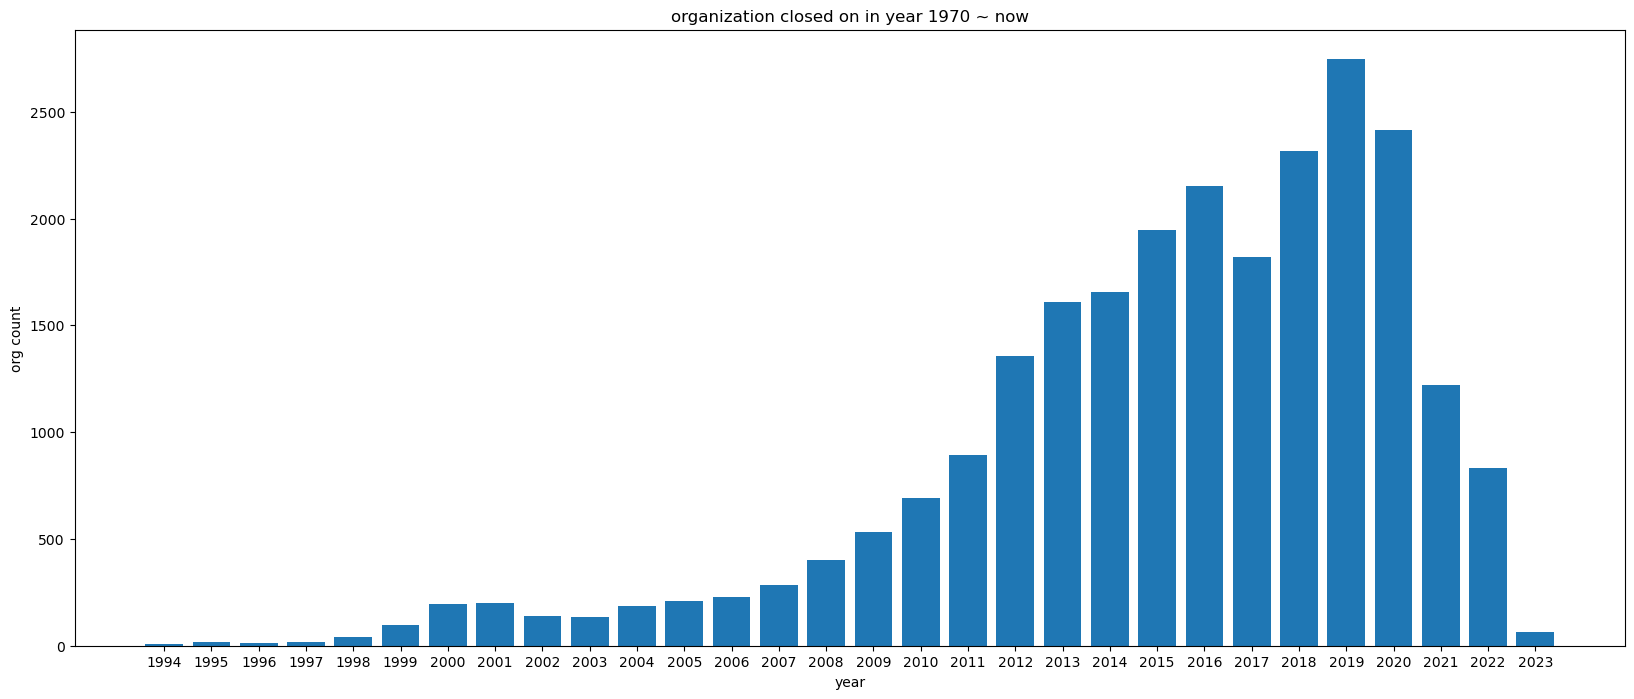

In [103]:
temp_x =  org_df['yearof_closed_on'].value_counts().sort_index(ascending=False)[:30].keys()[::-1]
temp_y = org_df['yearof_closed_on'].value_counts().sort_index(ascending=False)[:30].values[::-1]

plt.figure(figsize=(20,8))
plt.bar(temp_x, temp_y)
#plt.xscale('log')
#plt.xlim(1, 3300_000)
plt.title('organization closed on in year 1970 ~ now')
plt.xlabel('year')
plt.ylabel('org count')

In [33]:
org_df['primary_role'].value_counts().to_frame()

,primary_role
company,2547662
investor,81759
school,20667


In [107]:
org_df['employee_count'].value_counts().keys()

Index(['1-10', '11-50', 'unknown', '101-250', '51-100', '251-500', '501-1000',
       '1001-5000', '10000+', '5001-10000'],
      dtype='object')

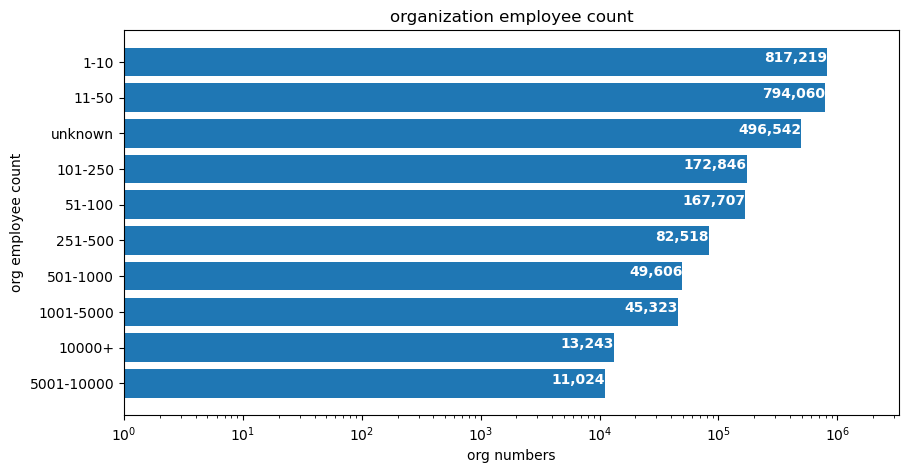

In [78]:

temp_x=org_df['employee_count'].value_counts().keys()[::-1]
temp_y=org_df['employee_count'].value_counts().values[::-1]
plt.figure(figsize=(10,5))
plt.barh(temp_x, temp_y)
plt.xscale('log')
plt.xlim(1, 3300_000)
plt.title('organization employee count')
plt.xlabel('org numbers')
plt.ylabel('org employee count')

for i, v in enumerate(temp_y):
    plt.text(v  ,i, f"{v:,}", color= 'w', fontweight='bold', ha='right')
    


In [118]:
org_df[['name','num_exits','employee_count','total_funding_usd','primary_role']].sort_values(by='num_exits' ,ascending=False)[:20]

,name,num_exits,employee_count,total_funding_usd,primary_role
697,New Enterprise Associates,567.0,51-100,NaN,investor
1983,Intel Capital,485.0,51-100,0.0,investor
2432,Y Combinator,480.0,1001-5000,0.0,investor
206892,Techstars,426.0,251-500,108919999.0,investor
20930,SV Angel,421.0,1-10,0.0,investor
31,Sequoia Capital,358.0,51-100,NaN,investor
42385,500 Global,357.0,1001-5000,2271999.0,investor
6,Accel,354.0,501-1000,NaN,investor
22456,Silicon Valley Bank,343.0,5001-10000,NaN,investor
58,Goldman Sachs,336.0,10000+,NaN,investor


In [119]:

org_df[['name','num_exits','num_funding_rounds','employee_count','total_funding_usd','primary_role']].sort_values(by='num_exits' ,ascending=False)[:20]

,name,num_exits,num_funding_rounds,employee_count,total_funding_usd,primary_role
697,New Enterprise Associates,567.0,NaN,51-100,NaN,investor
1983,Intel Capital,485.0,1.0,51-100,0.0,investor
2432,Y Combinator,480.0,1.0,1001-5000,0.0,investor
206892,Techstars,426.0,7.0,251-500,108919999.0,investor
20930,SV Angel,421.0,1.0,1-10,0.0,investor
31,Sequoia Capital,358.0,NaN,51-100,NaN,investor
42385,500 Global,357.0,8.0,1001-5000,2271999.0,investor
6,Accel,354.0,NaN,501-1000,NaN,investor
22456,Silicon Valley Bank,343.0,NaN,5001-10000,NaN,investor
58,Goldman Sachs,336.0,NaN,10000+,NaN,investor


<Axes: >

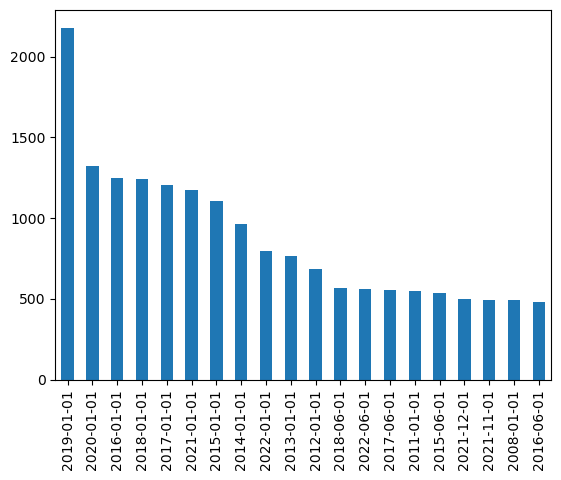

2015-01-01    58521
2014-01-01    56903
2012-01-01    53636
2013-01-01    53563
2016-01-01    52811
              ...  
1089-11-15        1
1875-11-29        1
1964-08-27        1
1925-09-15        1
2023-03-04        1
Name: founded_on, Length: 27156, dtype: int64

### category_of org

In [104]:
org_df['category_groups_list'].value_counts(ascending=False)[0:10]

Health Care                                   101151
Real Estate                                    53262
Financial Services                             50877
Manufacturing                                  33760
Financial Services,Lending and Investments     33579
Financial Services,Professional Services       32922
Information Technology,Software                25922
Professional Services                          25335
Advertising,Sales and Marketing                25187
Transportation                                 24895
Name: category_groups_list, dtype: int64

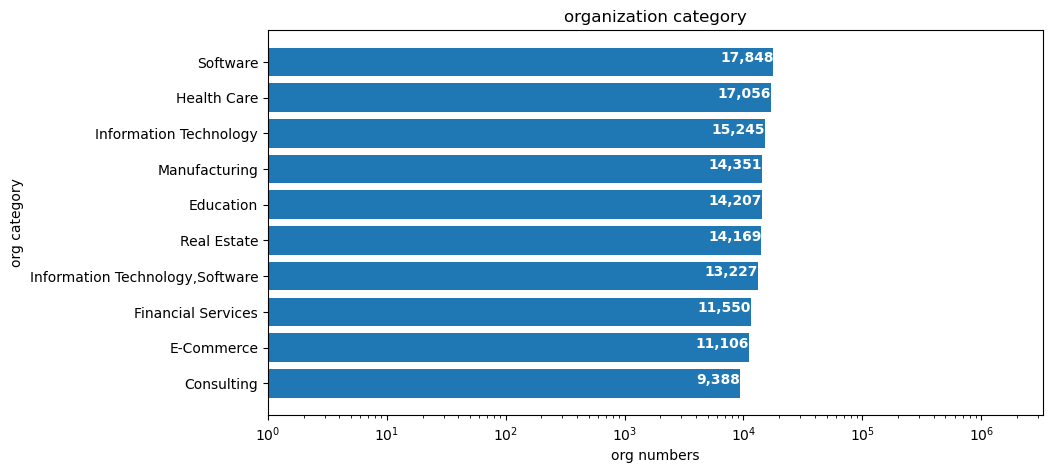

In [105]:
temp_x=org_df['category_list'].value_counts(ascending=False)[0:10].keys()[::-1]
temp_y=org_df['category_list'].value_counts(ascending=False)[0:10].values [::-1]
plt.figure(figsize=(10,5))
plt.barh(temp_x, temp_y)
plt.xscale('log')
plt.xlim(1, 3300_000)
plt.title('organization category')
plt.xlabel('org numbers')
plt.ylabel('org category')

for i, v in enumerate(temp_y):
    plt.text(v  ,i, f"{v:,}", color= 'w', fontweight='bold', ha='right')

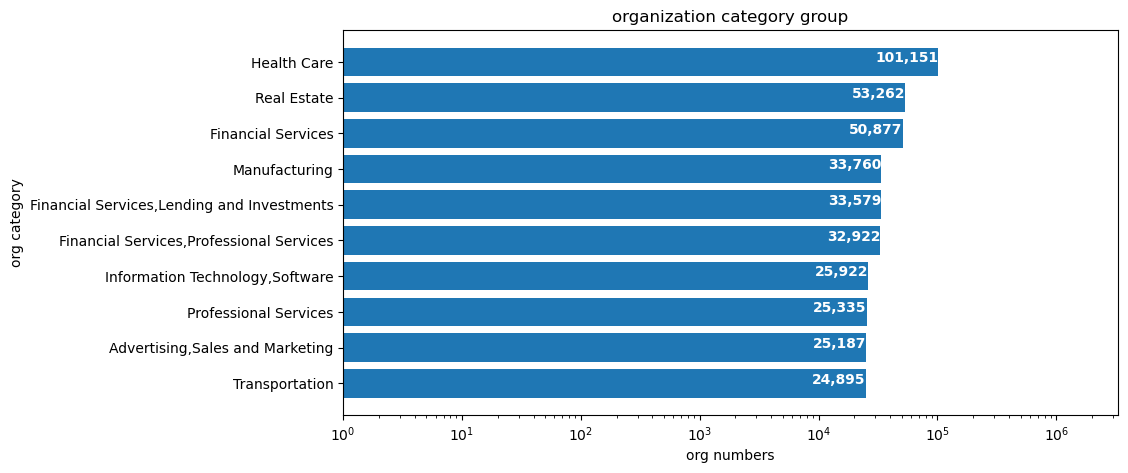

In [41]:
temp_x=org_df['category_groups_list'].value_counts(ascending=False)[0:10].keys()[::-1]
temp_y=org_df['category_groups_list'].value_counts(ascending=False)[0:10].values [::-1]
plt.figure(figsize=(10,5))
plt.barh(temp_x, temp_y)
plt.xscale('log')
plt.xlim(1, 3300_000)
plt.title('organization category group')
plt.xlabel('org numbers')
plt.ylabel('org category')

for i, v in enumerate(temp_y):
    plt.text(v  ,i, f"{v:,}", color= 'w', fontweight='bold', ha='right')

In [99]:
# category of the orgs, and 
category_df =pd.read_csv('/home/users/JunhaPark/crunchbase/bulk_export/category_groups.csv')
category_df.groupby('category_groups_list').count()


,uuid,name,type,permalink,cb_url,rank,created_at,updated_at
category_groups_list,,,,,,,,
Administrative Services,14,14,14,14,14,0,14,14
"Administrative Services,Education",1,1,1,1,1,0,1,1
"Administrative Services,Financial Services",1,1,1,1,1,0,1,1
"Administrative Services,Health Care",1,1,1,1,1,0,1,1
"Administrative Services,Other",2,2,2,2,2,0,2,2
...,...,...,...,...,...,...,...,...
Software,24,24,24,24,24,0,24,24
Sports,26,26,26,26,26,0,26,26
Sustainability,8,8,8,8,8,0,8,8


In [29]:
org_eda_df.sort_values(by=['total_funding_usd'],ascending=False).head(10)

,uuid,name,type,roles,domain,homepage_url,country_code,state_code,region,city,category_list,num_funding_rounds,total_funding_usd,founded_on,last_funding_on,closed_on,employee_count,primary_role
2279,3a7ec450-5422-1553-6c6a-4b28f6d4a17c,Netflix,organization,"investor,company",netflix.com,https://www.netflix.com,USA,CA,California,Los Gatos,"Digital Entertainment,Media and Entertainment,...",13.0,1.219077e+11,1997-01-01,2018-05-05,NaN,10000+,company
26281,bb4c6000-f368-a3dd-f85e-e637a865c898,Broadcom Limited,organization,company,broadcom.com,http://broadcom.com,USA,CA,California,San Jose,"Electronics,Information Technology,Manufacturi...",1.0,1.000000e+11,2005-01-01,2018-02-12,NaN,5001-10000,company
4078,e693e2f0-50bb-05ab-8a27-4078f5dacf11,Verizon,organization,"investor,company",verizon.com,http://www.verizon.com/,USA,NY,New York,New York,"Communications Infrastructure,Information Tech...",10.0,3.010319e+10,1983-10-07,2022-09-16,NaN,10000+,company
385305,42cd77d5-9fd6-a2ce-63ec-45eebd518709,Amgen,organization,"investor,company",amgen.com,http://www.amgen.com,USA,CA,California,Thousand Oaks,"Biotechnology,Health Care,Manufacturing,Pharma...",1.0,2.850000e+10,1980-01-01,2022-12-12,NaN,10000+,company
5697,7ef1577a-8779-8044-4a42-669b796f8e4f,Xerox,organization,"investor,company",xerox.com,https://www.xerox.com/,USA,CT,Connecticut,Norwalk,"Digital Media,Hardware,Information Technology,...",4.0,2.720000e+10,1960-01-01,2020-01-06,NaN,10000+,company
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,"investor,company",meta.com,https://meta.com,USA,CA,California,Menlo Park,"Augmented Reality,Social Media,Social Network,...",17.0,2.612282e+10,2004-02-04,2022-08-04,NaN,10000+,company
40526,1eb37109-3b93-01a9-177f-fee2cb1bfcdc,Uber,organization,"investor,company",uber.com,http://www.uber.com,USA,CA,California,San Francisco,"Logistics,Mobile Apps,Public Transportation,Ri...",32.0,2.521245e+10,2009-03-01,2020-09-14,NaN,10000+,company
283071,1383dbc0-9120-2d67-30a8-a7c652bfa95b,Reliance Jio,organization,"investor,company",jio.com,https://www.jio.com,IND,NaN,Maharashtra,Mumbai,"Apps,Consumer Electronics,Electronics,Informat...",17.0,2.476762e+10,2010-01-01,2020-07-15,NaN,10000+,company
307679,44996a96-b3bc-2498-2d15-ea91a4b608e2,Tsinghua Unigroup,organization,"investor,company",unigroup.com.cn,http://www.unigroup.com.cn,CHN,NaN,Beijing,Beijing,"Consumer Electronics,Information Technology,Ma...",3.0,2.409053e+10,1988-01-01,2022-07-13,NaN,10000+,company
166239,eab915a8-f414-64e0-5138-c5f341596a5b,Didi,organization,"investor,company",didiglobal.com,https://www.didiglobal.com,CHN,NaN,Beijing,Beijing,"Artificial Intelligence,Mobile Apps,Public Tra...",23.0,2.274670e+10,2012-09-01,2021-04-09,NaN,10000+,company


# org parents
--- 
자회사   파악  

name -> parent_name

In [2]:
org_parents_df = pd.read_csv('/home/users/JunhaPark/crunchbase/bulk_export/org_parents.csv')

In [3]:
org_parents_df.shape

(24089, 10)

In [4]:
org_parents_df['parent_name'].unique().shape

(13827,)

In [5]:
org_parents_df['name'].unique().shape

(24038,)

In [6]:
org_parents_df['uuid'].unique().shape

(24089,)

In [7]:
df  = org_parents_df[['name','parent_name']]
df

,name,parent_name
0,Fox Interactive Media,21st Century Fox
1,Hutchison Whampoa,Cheung Kong Holdings
2,CBS Entertainment,CBS Corporation
3,Plaxo,Comcast
4,AddThis,Oracle
...,...,...
24084,WXC Technology,Digital Xperience Holdings
24085,AEROCONE GLOBAL CONSULTING LIMITED,AEROCONE TRAVELS CANADA INC
24086,AEROCONE TRAVELS AND COMPANIES UK LIMITED,AEROCONE TRAVELS AND COMPANIES UK LIMITED
24087,AEROCONE TRAVELS AND COMPANIES UK LIMITED,AEROCONE TRAVELS CANADA INC


In [20]:
import networkx as nx

g2 = nx.from_pandas_edgelist(df, source='name',target='parent_name',create_using=nx.DiGraph)

In [21]:
type(g2)

networkx.classes.digraph.DiGraph

In [23]:
print(g2)

DiGraph with 36652 nodes and 24074 edges


In [27]:
in_deg_seq = [d for i,d in g2.in_degree()]
in_meank = sum(in_deg_seq)/len(g2)
print(in_meank)

sub_nodes = [i for i,d in g2.in_degree() if d >= 3]

0.6568263669104005


In [34]:
# sub_nodes

In [37]:
# 생각하기
new_df = df[df['name'].isin(sub_nodes) | df['parent_name'].isin(sub_nodes)]
graph = nx.from_pandas_edgelist(new_df,source='name',target='parent_name',create_using=nx.DiGraph)

In [38]:
print(graph)

DiGraph with 12055 nodes and 10431 edges


In [26]:
import numpy as np 
np.unique(in_deg_seq,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        36, 38, 39, 45, 47, 55]),
 array([22825, 10419,  1645,   638,   348,   192,   140,    97,    73,
           51,    40,    31,    20,    21,    15,    13,    12,    10,
           11,    10,     6,     6,     5,     3,     2,     2,     1,
            1,     1,     3,     1,     1,     1,     2,     1,     1,
            1,     1,     1,     1]))

In [28]:
# graph = g2.subgraph(sub_nodes)

In [40]:
print(graph)

DiGraph with 12055 nodes and 10431 edges


In [42]:
graph.degree, graph.in_degree, graph.out_degree

(DiDegreeView({'Fox Interactive Media': 1, '21st Century Fox': 14, 'CBS Entertainment': 4, 'CBS Corporation': 22, 'Plaxo': 1, 'Comcast': 28, 'AddThis': 1, 'Oracle': 9, 'Hearst Communications': 8, 'The Arena Group': 3, 'Liberty Associated Partners': 1, 'Liberty Media': 3, 'Fidelity Ventures': 1, 'Fidelity': 5, 'REV': 1, 'RELX Group plc': 4, 'SodaHead': 1, 'Prodege': 5, 'NBCUniversal': 1, 'Skype': 1, 'Microsoft': 38, 'BDC Venture Capital': 1, 'Business Development Bank of Canada': 3, 'Norwest Venture Partners': 1, 'Wells Fargo & Company': 15, 'LinkedIn': 1, 'Jamendo': 1, 'AudioValley': 3, 'SK Telecom': 1, 'SK Group': 6, 'Sony': 8, 'Sony Biz Networks Corporation': 1, 'Vudu': 1, 'Walmart': 16, 'SoftBank Capital': 1, 'SoftBank': 16, 'AOL': 9, 'Verizon Media': 14, 'IMVU': 1, 'Together Labs': 4, 'Kongregate': 1, 'GameStop': 7, 'TechCrunch': 1, 'A9': 1, 'Amazon': 33, 'Doostang': 1, 'Talent Inc.': 4, 'Trulia': 1, 'Zillow Group': 10, 'DB Capital Ventures': 1, 'Deutsche Bank': 5, 'Shopping.com': 

In [46]:
in_deg_seq = [d for i,d in graph.in_degree()]
k,count = np.unique(in_deg_seq,return_counts=True)
# cluster size ,centerality 

In [47]:
k,count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        36, 38, 39, 45, 47, 55]),
 array([10227,    64,     1,   638,   348,   192,   140,    97,    73,
           51,    40,    31,    20,    21,    15,    13,    12,    10,
           11,    10,     6,     6,     5,     3,     2,     2,     1,
            1,     1,     3,     1,     1,     1,     2,     1,     1,
            1,     1,     1,     1]))

In [50]:
[i for i,d in graph.in_degree() if d==2]

['United Saud Group']

[]

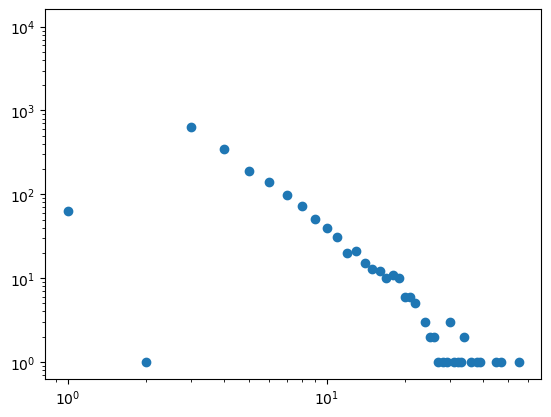

In [45]:
plt.scatter(k,count)
plt.loglog()

### future work

In [39]:
plt.figure(figsize=(15,13))
nx.draw_networkx(graph,pos=nx.spring_layout(graph),with_labels=False)

KeyboardInterrupt: 

<Figure size 1500x1300 with 0 Axes>

In [31]:
nx.conn

NetworkXNotImplemented: not implemented for directed type

In [19]:
nx.draw_networkx(g2, pos=nx.spring_layout(g2))

TypeError: '_AxesStack' object is not callable

<Figure size 640x480 with 0 Axes>

In [139]:
g = nx.DiGraph()

In [140]:
for i in range(len(df)):
    cur_row = list(df.loc[i])
    g.add_edges_from([(cur_row[0],cur_row[1])])

In [141]:
print(g)

DiGraph with 36652 nodes and 24074 edges


In [142]:
g.edges

OutEdgeView([('Fox Interactive Media', '21st Century Fox'), ('Hutchison Whampoa', 'Cheung Kong Holdings'), ('CBS Entertainment', 'CBS Corporation'), ('Plaxo', 'Comcast'), ('Comcast', 'SkyShowtime'), ('AddThis', 'Oracle'), ('Hearst Communications', 'The Arena Group'), ('Liberty Associated Partners', 'Liberty Media'), ('Fidelity Ventures', 'Fidelity'), ('REV', 'RELX Group plc'), ('SodaHead', 'Prodege'), ('NBCUniversal', 'Comcast'), ('Skype', 'Microsoft'), ('BDC Venture Capital', 'Business Development Bank of Canada'), ('blinkx', 'RhythmOne'), ('Norwest Venture Partners', 'Wells Fargo & Company'), ('Linden Lab', 'Second Life'), ('LinkedIn', 'Microsoft'), ('Jamendo', 'AudioValley'), ('Vulcan Capital', 'Vulcan'), ('SK Telecom', 'SK Group'), ('SK Group', 'SK Holdings'), ('hi5', 'if(we)'), ('Sony', 'Sony Biz Networks Corporation'), ('Sony Biz Networks Corporation', 'So-net'), ('Condé Nast', 'Advance'), ('Vudu', 'Walmart'), ('SoftBank Capital', 'SoftBank'), ('GE Commercial Finance', 'GE Capita

In [143]:
g.degree()

DiDegreeView({'Fox Interactive Media': 1, '21st Century Fox': 14, 'Hutchison Whampoa': 2, 'Cheung Kong Holdings': 1, 'CBS Entertainment': 4, 'CBS Corporation': 22, 'Plaxo': 1, 'Comcast': 28, 'AddThis': 1, 'Oracle': 9, 'Hearst Communications': 8, 'The Arena Group': 3, 'Liberty Associated Partners': 1, 'Liberty Media': 3, 'Fidelity Ventures': 1, 'Fidelity': 5, 'REV': 1, 'RELX Group plc': 4, 'SodaHead': 1, 'Prodege': 5, 'NBCUniversal': 3, 'Skype': 1, 'Microsoft': 38, 'BDC Venture Capital': 2, 'Business Development Bank of Canada': 3, 'blinkx': 1, 'RhythmOne': 1, 'Norwest Venture Partners': 1, 'Wells Fargo & Company': 15, 'Linden Lab': 1, 'Second Life': 1, 'LinkedIn': 1, 'Jamendo': 2, 'AudioValley': 3, 'Vulcan Capital': 1, 'Vulcan': 1, 'SK Telecom': 2, 'SK Group': 6, 'hi5': 1, 'if(we)': 2, 'Sony': 8, 'Sony Biz Networks Corporation': 2, 'Condé Nast': 3, 'Advance': 1, 'Vudu': 1, 'Walmart': 16, 'SoftBank Capital': 1, 'SoftBank': 16, 'GE Commercial Finance': 1, 'GE Capital': 3, 'Maverick Ventu

In [144]:
nx.draw(g, pos=nx.spring_layout(g))



## fund organization 
org 가 가지는 funds 에 대해서 작성합니다. 

In [69]:
funds_df = pd.read_csv('/home/users/JunhaPark/crunchbase/bulk_export/funds.csv')

In [71]:
funds_eda_df = funds_df[['name', 'type', 'entity_name','announced_on', 'raised_amount_usd', 'raised_amount','raised_amount_currency_code']]

In [74]:
funds_eda_df.sort_values(by='raised_amount_usd', ascending=False)

,name,type,entity_name,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code
11978,SoftBank Vision Fund II,fund,SoftBank Vision Fund,2019-07-25,1.080000e+11,1.080000e+11,USD
4855,Softbank Vision Fund,fund,SoftBank Vision Fund,2017-05-18,1.000000e+11,1.000000e+11,USD
13678,Development Finance Institution Fund I,fund,Development Finance Institution (DFI),2020-01-20,1.000000e+11,1.000000e+11,USD
11101,Latasha williamson fund,fund,Epic Games,2019-03-20,1.000000e+11,1.000000e+11,USD
21408,Kingceo,fund,Kingceo,2022-11-07,7.777778e+10,7.777778e+10,USD
...,...,...,...,...,...,...,...
22029,SoLa Fund IV,fund,SoLa Impact,2023-02-24,NaN,NaN,NaN
22038,"GreenGen Ventures Fund I, LP",fund,GreenGen Ventures,2021-05-28,NaN,NaN,NaN
22039,NewBound Ventures Fund II,fund,NewBound Venture Capital,NaT,NaN,NaN,NaN
22040,Silent Ventures Fund I,fund,Silent Ventures,2023-03-10,NaN,NaN,NaN


In [ ]:
funds_eda_df['raised_amount_usd']
plt.plot(data=funds_eda_df, )

##  aquisitions 
---
인수 합병에 대한 이야기다. 따라서 인수되는 기업과 인수 하는 기업으로 나뉘어진다. 

In [95]:
acquisitions_df = pd.read_csv('/home/users/JunhaPark/crunchbase/bulk_export/acquisitions.csv')

In [96]:
acquisitions_df

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,acquiree_uuid,acquiree_name,...,acquirer_cb_url,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquisition_type,acquired_on,price_usd,price,price_currency_code
0,c62807f2-3487-f63b-e7fc-559b752ed44c,Flektor acquired by Fox Interactive Media,acquisition,fox-interactive-media-acquires-flektor--c62807f2,https://www.crunchbase.com/acquisition/fox-int...,113930.0,2007-05-31 22:19:54,2018-02-13 00:09:05,180ebf67-68d0-2316-e93d-8e1e546330ba,Flektor,...,https://www.crunchbase.com/organization/fox-in...,USA,CA,California,Beverly Hills,NaN,2007-05-30,NaN,NaN,NaN
1,419cabe1-4d71-5f64-3e9b-c9d0fb445cca,GrandCentral acquired by Google,acquisition,google-acquires-grandcentral--419cabe1,https://www.crunchbase.com/acquisition/google-...,50726.0,2007-07-03 08:14:50,2018-02-12 22:14:26,5b05e013-a448-3a0b-d872-a6ae668e1192,GrandCentral,...,https://www.crunchbase.com/organization/google,USA,CA,California,Mountain View,NaN,2007-07-01,6.000000e+07,6.000000e+07,USD
2,01bd2058-ccf8-6102-f253-9224a67a592b,Last.fm acquired by CBS Entertainment,acquisition,cbs-acquires-last-fm--01bd2058,https://www.crunchbase.com/acquisition/cbs-acq...,60281.0,2007-07-12 04:19:24,2018-02-12 23:41:20,8249dffa-1ca6-6f99-9f76-d56c83f85f2d,Last.fm,...,https://www.crunchbase.com/organization/cbs,USA,NY,New York,New York,NaN,2007-05-01,2.800000e+08,2.800000e+08,USD
3,831becd6-e913-b9f5-ac09-2bff915f9453,FeedBurner acquired by Google,acquisition,google-acquires-feedburner--831becd6,https://www.crunchbase.com/acquisition/google-...,49055.0,2007-07-13 09:52:59,2018-02-12 23:43:38,10dd03fa-69ff-3a82-6321-c6b16c9a9f41,FeedBurner,...,https://www.crunchbase.com/organization/google,USA,CA,California,Mountain View,acquisition,2007-05-23,1.000000e+08,1.000000e+08,USD
4,9da90ee7-aad7-e0b4-8456-839363032e5e,Recipezaar acquired by Scripps Networks,acquisition,scripps-networks-interactive-acquires-recipeza...,https://www.crunchbase.com/acquisition/scripps...,120135.0,2007-07-20 05:29:07,2018-02-12 23:51:07,0af10345-613d-e144-f8bd-b62e288985a0,Recipezaar,...,https://www.crunchbase.com/organization/scripp...,USA,TN,Tennessee,Knoxville,NaN,2007-07-01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148123,18030cad-22c6-4f0b-ada9-f02069006144,PE Stack acquired by Holland Mountain,acquisition,holland-mountain-acquires-pe-stack--18030cad,https://www.crunchbase.com/acquisition/holland...,7189.0,2023-03-04 11:31:36,2023-03-04 11:31:36,be29c1ce-6122-40bb-bc19-28a0f7a30ad3,PE Stack,...,https://www.crunchbase.com/organization/hollan...,GBR,NaN,England,London,NaN,2022-11-01,NaN,NaN,NaN
148124,8e0a7e83-730e-44bd-8729-0fab32295d4c,Flormando acquired by Flowers' House Group,acquisition,flowers-house-group-acquires-flormando--8e0a7e83,https://www.crunchbase.com/acquisition/flowers...,7188.0,2023-03-04 12:51:15,2023-03-04 12:51:15,28a60503-d19c-49ec-bb3f-3598a58d5edc,Flormando,...,https://www.crunchbase.com/organization/flower...,USA,FL,Florida,Miami,acquisition,2021-10-01,NaN,NaN,NaN
148125,0bfba3fa-12b9-44df-b25e-57b929265ed6,Santana Business Network acquired by SANTANA H...,acquisition,santana-henry-private-banking-invesments-acqui...,https://www.crunchbase.com/acquisition/santana...,84151.0,2023-03-05 03:15:59,2023-03-05 03:36:54,beda48e2-ed73-4e58-a5f3-91b61b80c2a3,Santana Business Network,...,https://www.crunchbase.com/organization/santan...,NZL,NaN,Auckland,Auckland,acquisition,2023-02-08,1.800000e+11,1.800000e+11,USD
148126,7947b48b-c26c-4e3f-946d-553636e665b1,Bolia.com acquired by Lars Larsen Group,acquisition,lars-larsen-group-acquires-bolia-com--7947b48b,https://www.crunchbase.com/acquisition/lars-la...,NaN,2023-03-05 20:08:33,2023-03-05 20:08:33,7b14461b-9c62-4e40-bcd0-4e92696d9ce3,Bolia.com,...,https://www.crunchbase.com/organization/lars-l...,DNK,NaN,Midtjylland,Brabrand,NaN,2001-01-01,NaN,NaN,NaN


# ipo  and funding rounds  by organization
---
ipo 정책과 기업의 인수는 성격은 다르나기업끼리 연결되어있다. 


In [31]:
# org references and the link of all 
ipo_df = pd.read_csv('/home/users/JunhaPark/crunchbase/bulk_export/ipos.csv')
funding_rounds_df =pd.read_csv('/home/users/JunhaPark/crunchbase/bulk_export/funding_rounds.csv')

In [39]:
funding_rounds_df[['name','country_code', 'state_code', 'region', 'city',
                   'investment_type', 'announced_on', 'raised_amount_usd', 'raised_amount','raised_amount_currency_code',
                   'post_money_valuation_usd','post_money_valuation', 'post_money_valuation_currency_code',
                   'investor_count', 'org_uuid', 'org_name', 'lead_investor_uuids']]

,name,country_code,state_code,region,city,investment_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code,post_money_valuation_usd,post_money_valuation,post_money_valuation_currency_code,investor_count,org_uuid,org_name,lead_investor_uuids
0,Angel Round - Meta,USA,CA,California,Menlo Park,angel,2004-09-01,500000.0,500000.0,USD,NaN,NaN,NaN,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,3f47be49-2e32-8118-01a0-31685a4d0fd7
1,Series A - Meta,USA,CA,California,Menlo Park,series_a,2005-05-01,12700000.0,12700000.0,USD,98000000.0,98000000.0,USD,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,b08efc27-da40-505a-6f9d-c9e14247bf36
2,Series B - Meta,USA,CA,California,Menlo Park,series_b,2006-04-01,27500000.0,27500000.0,USD,502500000.0,502500000.0,USD,5.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,"e2006571-6b7a-e477-002a-f7014f48a7e3,8d5c7e48-..."
3,Series B - Photobucket,USA,CO,Colorado,Denver,series_b,2006-05-01,10500000.0,10500000.0,USD,NaN,NaN,NaN,2.0,f53cb4de-236e-0b1b-dee8-7104a8b018f9,Photobucket,NaN
4,Series A - Geni,USA,CA,California,West Hollywood,series_a,2007-01-17,NaN,NaN,NaN,10000000.0,10000000.0,USD,1.0,4111dc8b-c0df-2d24-ed33-30cd137b3098,Geni,fb2f8884-ec07-895a-48d7-d9a9d4d7175c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539340,Series B - Vesper Marine,NZL,NaN,Auckland,Auckland,series_b,2020-05-01,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0710ed9c-30e2-411f-b386-0ddf83645dbb,Vesper Marine,NaN
539341,Seed Round - Mish Guru,USA,NY,New York,New York,seed,2015-06-01,500000.0,500000.0,USD,NaN,NaN,NaN,1.0,93c1644f-ee78-83a6-a406-fe4d06cf4a12,Mish Guru,NaN
539342,Seed Round - Soins Karismä,CAN,QC,Quebec,Montréal,seed,2023-02-01,1506673.0,2000000.0,CAD,6026692.0,8000000.0,CAD,NaN,ad5903ba-8283-49c3-a1ef-873fdfc11260,Soins Karismä,NaN
539343,Seed Round - Splint Invest,CHE,NaN,Zug,Zug,seed,2023-03-01,NaN,NaN,NaN,10806275.0,10200000.0,EUR,1.0,be98e027-b70b-434e-9039-9e61fd5f5742,Splint Invest,NaN


In [35]:
ipo_df[['went_public_on','org_name','country_code', 'state_code', 'region', 'city','stock_exchange_symbol', 'stock_symbol', 
        'share_price_usd', 'share_price','share_price_currency_code',
        'valuation_price_usd', 'valuation_price','valuation_price_currency_code',
        'money_raised_usd', 'money_raised','money_raised_currency_code']]

,went_public_on,org_name,country_code,state_code,region,city,stock_exchange_symbol,stock_symbol,share_price_usd,share_price,share_price_currency_code,valuation_price_usd,valuation_price,valuation_price_currency_code,money_raised_usd,money_raised,money_raised_currency_code
0,1986-03-13,Microsoft,USA,WA,Washington,Redmond,nasdaq,MSFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1978-01-13,The Walt Disney Company,USA,CA,California,Burbank,nyse,DIS,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+08,3.000000e+08,USD
2,2006-10-22,DivX,USA,CA,California,San Diego,nasdaq,DIVX,16.000000,16.0,USD,1.600000e+08,1.600000e+08,USD,1.450000e+08,1.450000e+08,USD
3,1999-12-02,The Knot Worldwide,USA,NY,New York,New York,nyse,XOXO,NaN,NaN,NaN,NaN,NaN,NaN,3.500000e+07,3.500000e+07,USD
4,1988-08-12,BMC Software,USA,TX,Texas,Houston,nasdaq,BMC,NaN,NaN,NaN,6.000000e+09,6.000000e+09,USD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48719,2021-03-12,Denarius Metals,CAN,ON,Ontario,Toronto,cve,DSLV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48720,2000-01-07,Sanoma Media,FIN,NaN,Southern Finland,Helsinki,hel,SANOMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48721,2010-07-02,Marisa,BRA,NaN,Sao Paulo,São Paulo,bvmf,AMAR3,9381.457818,16720.0,BRL,1.923664e+08,3.428429e+08,BRL,1.150239e+08,2.050000e+08,BRL
48722,2023-02-05,Santana Co & Henry Associates,NZL,NaN,Auckland,Auckland,nze,SHIANZ,31629.034441,50000.0,NZD,4.744355e+08,7.500000e+08,NZD,1.138645e+09,1.800000e+09,NZD


In [97]:
ipo_df['stock_exchange_symbol'].value_counts()

nasdaq    5804
tyo       3548
nyse      3057
bom       2940
neeq      2609
          ... 
lsx          1
altx         1
bvm          1
tse_al       1
iex          1
Name: stock_exchange_symbol, Length: 140, dtype: int64

## Funding Types

| Funding Type (`investment_type`) | Humanized                | Description |
| :------------------------------- | :----------------------- | :---------- |
| pre_seed                         | Pre-Seed                 |             |
| seed                             | Seed                     |             |
| angel                            | Angel                    |             |
| equity_crowdfunding              | Equity Crowdfunding      |             |
| product_crowdfunding             | Product Crowdfunding     |             |
| private_equity                   | Private Equity           |             |
| convertible_note                 | Convertible Note         |             |
| debt_financing                   | Debt Financing           |             |
| secondary_market                 | Secondary Market         |             |
| grant                            | Grant                    |             |
| non_equity_assistance            | Non-Equity Assistance    |             |
| undisclosed                      | Undisclosed              |             |
| corporate_round                  | Corporate Round          |             |
| initial_coin_offering            | Initial Coin Offering    |             |
| post_ipo_equity                  | Post-IPO Equity          |             |
| post_ipo_debt                    | Post-IPO Debt            |             |
| post_ipo_secondary               | Post-IPO Secondary       |             |
| series_a                         | Series A                 |             |
| series_b                         | Series B                 |             |
| series_c                         | Series C                 |             |
| series_d                         | Series D                 |             |
| series_e                         | Series E                 |             |
| series_f                         | Series F                 |             |
| series_g                         | Series G                 |             |
| series_h                         | Series H                 |             |
| series_i                         | Series I                 |             |
| series_j                         | Series J                 |             |
| series_unknown                   | Venture - Series Unknown |             |

## Funding Stages

| Funding Stage (`investment_stage`) | Humanized           | Description |
| :--------------------------------- | :------------------ | :---------- |
| seed                               | Seed                |             |
| early_stage_venture                | Early Stage Venture |             |
| late_stage_venture                 | Late Stage Venture  |             |
| private_equity                     | Private Equity      |             |
| m_and_a                            | M&A                 |             |
| ipo                                | IPO                 |             |



In [63]:
people_investors_df =investors_df[investors_df['type']=='person']

In [64]:
people_investors_df = people_investors_df[['uuid','name','country_code','state_code','region','city','investor_types','investment_count']]
people_investors_df

,uuid,name,country_code,state_code,region,city,investor_types,investment_count
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,USA,WA,Washington,Seattle,angel,2.0
4,a01b8d46-d311-3333-7c34-aa3ae9c03f22,Mark Zuckerberg,USA,CA,California,Palo Alto,"investment_partner,angel",8.0
5,084aaa07-0795-1fe8-9c46-98bbeb02cd64,Dustin Moskovitz,USA,CA,California,San Francisco,angel,18.0
6,d3ae96f0-4442-720f-1ec2-fc28eac94e53,Owen Van Natta,USA,CA,California,San Francisco,"investment_partner,angel",33.0
7,99b0ec22-248c-df20-c9bb-d898faf8dd68,Matt Cohler,USA,CA,California,San Francisco,"investment_partner,angel",5.0
...,...,...,...,...,...,...,...,...
243071,e6404000-9b84-4c94-b40a-bf5b047e096d,Trey Bowles,NaN,NaN,NaN,NaN,investment_partner,NaN
243072,703eb00a-ba90-405b-902e-0cb501fc8b14,Santana Henry,NZL,NaN,Auckland,Auckland,NaN,NaN
243074,8099940d-e9ec-4a2c-98ac-48f322e35252,Apk Creaters,PAK,NaN,NaN,NaN,NaN,NaN
243075,36f98fc2-3cf4-4ef3-b74f-58bb8eff10b0,Sanjeev Kumar Upadhyay,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

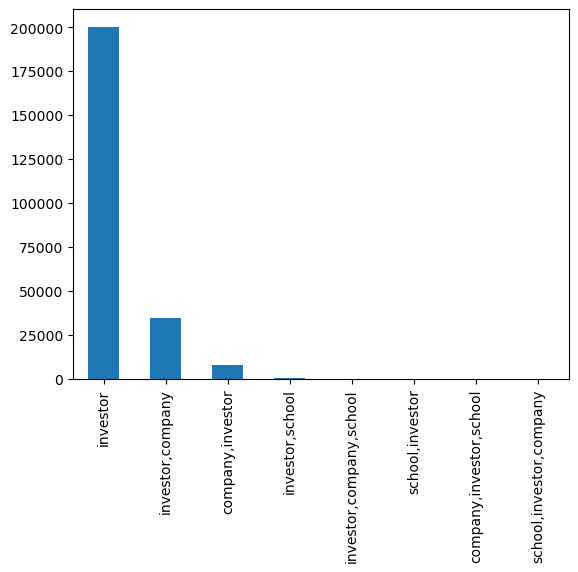

In [ ]:
investors_df['roles'].value_counts().plot(kind='bar')

### funding stage 
----
share price usd , valuation price usd , money raised_usd 에 대한 정보를 어떻게 받을 것인가를 문제 

[]

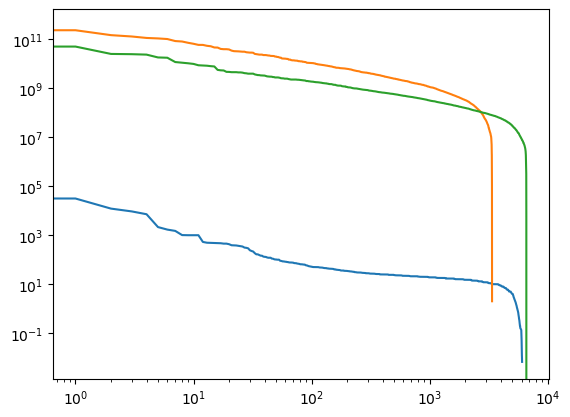

In [70]:
views = ['share_price_usd','valuation_price_usd','money_raised_usd']
ipo_idx = ipo_df[views[0]].sort_values(ascending=False).index
ipo_df[views[0]].sort_values(ascending=False).reset_index(drop=True).plot()
ipo_df[views[1]].sort_values(ascending=False).reset_index(drop=True).plot()
ipo_df[views[2]].sort_values(ascending=False).reset_index(drop=True).plot()
plt.loglog()

In [ ]:
merging_invest = pd.merge(investments_df, investors_df, left_on='investor_uuid', right_on='uuid')

In [ ]:
merging_invest_person = merging_invest[merging_invest['investor_type']=='person']

In [ ]:
merging_invest_person['investment_count'].describe()

count    117289.000000
mean         18.152043
std          38.028887
min           1.000000
25%           1.000000
50%           4.000000
75%          16.000000
max         303.000000
Name: investment_count, dtype: float64

<Axes: >

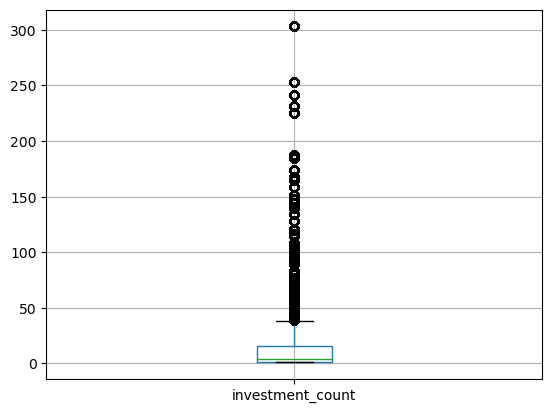

In [ ]:
merging_invest_person.boxplot(column=['investment_count'])

In [ ]:
merging_invest_person['funding_round_name']

6757             Series A - Babelgum
11657                Series A - Kyte
11658             Seed Round - Thoof
11659           Angel Round - Zooomr
11660          Angel Round - PBworks
                     ...            
875867          Series D - Coralogix
875868        Series D - Platform.sh
875869    Series C - SmartRecruiters
875870      Seed Round - Jobspotting
875871        Pre Seed Round - Kombo
Name: funding_round_name, Length: 117289, dtype: object

In [ ]:
merging_invest_person['funding_stage'] = merging_invest_person.funding_round_name.str.split(' - ').str[0]
merging_invest_person['funding_stage_company'] = merging_invest_person.funding_round_name.str.split(' - ').str[1] 

/tmp/ipykernel_99144/3257554322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_invest_person['funding_stage'] = merging_invest_person.funding_round_name.str.split(' - ').str[0]
/tmp/ipykernel_99144/3257554322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_invest_person['funding_stage_company'] = merging_invest_person.funding_round_name.str.split(' - ').str[1]


<Axes: title={'center': 'people funding round'}>

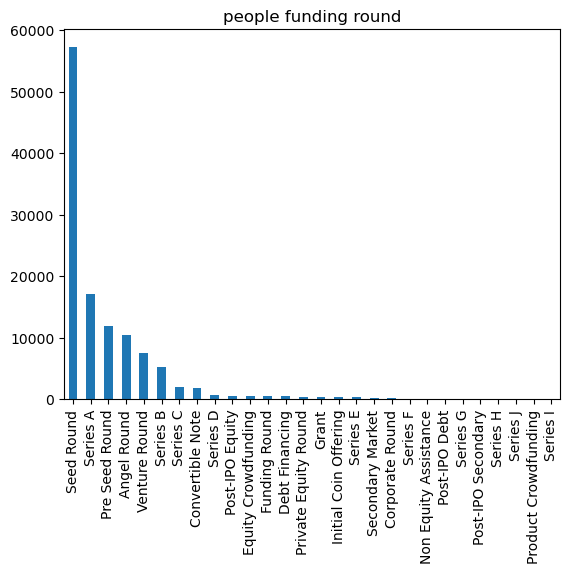

In [ ]:
merging_invest_person.funding_stage.value_counts().plot(kind='bar',title='people funding round')

# org _invesvtors groups
---

https://m.blog.naver.com/PostList.naver?blogId=novacite


In [ ]:
merging_invest_org = merging_invest[merging_invest['investor_type']=='organization']

In [ ]:
merging_invest_org['funding_round_name']

0                        Series A - Meta
1         Series A - Prosper Marketplace
2         Series B - Prosper Marketplace
3                    Series A - Netvibes
4                  Series B - Mode Media
                       ...              
875842            Pre Seed Round - Docus
875845          Pre Seed Round - Crowder
875846             Seed Round - Aerolane
875848        Secondary Market - Udacity
875872           Funding Round - Clavius
Name: funding_round_name, Length: 758584, dtype: object

In [ ]:
merging_invest_org['funding_stage'] = merging_invest_org.funding_round_name.str.split(' - ').str[0]
merging_invest_org['funding_stage_company'] = merging_invest_org.funding_round_name.str.split(' - ').str[1] 

/tmp/ipykernel_99144/4069876029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_invest_org['funding_stage'] = merging_invest_org.funding_round_name.str.split(' - ').str[0]
/tmp/ipykernel_99144/4069876029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_invest_org['funding_stage_company'] = merging_invest_org.funding_round_name.str.split(' - ').str[1]


<Axes: title={'center': 'org funding round'}>

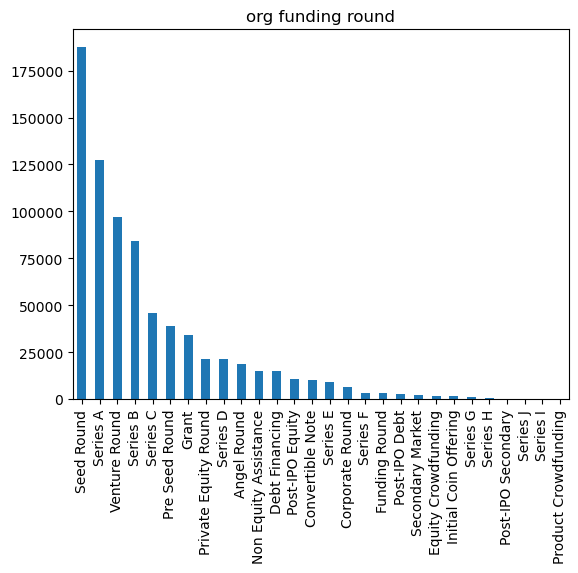

In [ ]:
merging_invest_org.funding_stage.value_counts().plot(kind='bar',title='org funding round')


##  Acquisition Types

| acquisition_type  | humanized         | description                                                  |
| :---------------- | :---------------- | :----------------------------------------------------------- |
| acquisition       | Acquisition       | Acquisition of the Organization in its entirety.             |
| acquihire         | Acqui-Hire        | Acquisition of the Organization for the primary purpose of acquiring the talent. |
| lbo               | LBO               | Leveraged Buy-Out                                            |
| merge             | Merger            |                                                              |
| management_buyout | Management Buyout |                                                              |

## Acquisition Terms

| acquisition_terms | humanized      | description                                  |
| :---------------- | :------------- | :------------------------------------------- |
| cash              | cash           | Acquired for all cash                        |
| stock             | stock          | Acquired for stock                           |
| cash_and_stock    | cash_and_stock | Acquired for a combination of cash and stock |

## Acquisition Status

| status   | humanized | description                    |
| :------- | :-------- | :----------------------------- |
| pending  | Pending   | Announced but not yet complete |
| complete | Complete  | Completed and closed           |

## Disposition of Acquired Entity

| disposition_of_acquired | humanized       | description                                                  |
| :---------------------- | :-------------- | :----------------------------------------------------------- |
| separate_entity         | Separate Entity | The acquired Organization is maintained as a separate legal entity |
| product                 | Product         | The acquired Organization is rolled into the acquirer as a Product |
| division                | Division        | The acquired Organization becomes a Division of the acquirer |
| subsidiary              | Subsidiary      | The acquired Organization becomes a Subsidiary of the acquirer |
| combined                | Combined        | The acquired Organization is combined / merged with the acquirer |




# person and jobs 

investments partners와의  일부와 , degreee 테이블과 jobs 테이블 과 연결이 되어있다. 

person을 기준으로 하여 person의 형태가 

people_df

In [23]:
people_df = pd.read_csv('/home/users/JunhaPark/crunchbase/bulk_export/people.csv')
degrees_df = pd.read_csv('/home/users/JunhaPark/crunchbase/bulk_export/degrees.csv')
jobs_df = pd.read_csv('/home/users/JunhaPark/crunchbase/bulk_export/jobs.csv') 

In [24]:
people_df[['name','gender','country_code','state_code','region','city','featured_job_organization_name','featured_job_title']]

,name,gender,country_code,state_code,region,city,featured_job_organization_name,featured_job_title
0,Ben Elowitz,male,USA,WA,Washington,Seattle,Zeitworks,Co-Founder
1,Kevin Flaherty,male,USA,WA,Washington,Mercer Island,DRSmedia,Team Member
2,Raju Vegesna,male,USA,CA,California,San Francisco,Zoho,Chief Evangelist
3,Ian Wenig,male,NaN,NaN,NaN,NaN,Zoho,VP Business Development
4,Owen Byrne,male,USA,CA,California,Mountain View,NaN,NaN
...,...,...,...,...,...,...,...,...
1647054,Filippo Lafronza,male,ITA,NaN,NaN,NaN,NaN,NaN
1647055,Nicolò Ronchi,male,ITA,NaN,NaN,NaN,NaN,NaN
1647056,Leonardo Pergola,male,NaN,NaN,NaN,NaN,NaN,NaN
1647057,Lorenzo Marchetti,male,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
degrees_df[['person_name','institution_name','degree_type','subject','started_on','completed_on','is_completed','name']]

,person_name,institution_name,degree_type,subject,started_on,completed_on,is_completed,name
0,John Green,Boston University,MS,Mass Communication,NaN,1992-01-01,True,MS Mass Communication @ Boston University
1,John Green,Washington University in St. Louis,BA,"English, French",NaN,1990-01-01,True,"BA English, French @ Washington University in..."
2,Sridhar Gundaiah,University of Greenwich,MS,Internet Technology,NaN,2006-01-01,True,MS Internet Technology @ University of Greenwich
3,John Furrier,Northeastern University,BS,Computer Science,NaN,1988-01-01,True,BS Computer Science @ Northeastern University
4,Ian Reardon,Rochester Institute of Technology,BS,Computer Science,NaN,2002-01-01,True,BS Computer Science @ Rochester Institute of ...
...,...,...,...,...,...,...,...,...
711958,Ara Grigorian,University of California Northridge.,BSEE,Electrical Engineering,1988-01-01,1994-01-01,True,BSEE Electrical Engineering @ University of C...
711959,Ara Grigorian,USC Marshall School of Business,MBA,"Product Development, Strategy & entrepreneurship",2000-01-01,2003-01-01,True,"MBA Product Development, Strategy & entrepren..."
711960,Alexandre Thome,FGV,Bachelor,"Business Administration and Management, General",2003-01-01,2007-01-01,True,Bachelor Business Administration and Manageme...
711961,Janet M Dunlap,Franklin and Marshall College,B.A.,Economics,1982-01-01,1986-01-01,True,B.A. Economics @ Franklin and Marshall College


In [28]:
jobs_df[['person_name','org_name','started_on','ended_on','is_current','title','job_type','name']]

,person_name,org_name,started_on,ended_on,is_current,title,job_type,name
0,Ben Elowitz,Wetpaint,2005-10-01,2014-06-01,False,Co-Founder and CEO,executive,Ben Elowitz Co-Founder and CEO @ Wetpaint
1,Kevin Flaherty,Wetpaint,NaN,NaN,False,VP Marketing,executive,Kevin Flaherty VP Marketing @ Wetpaint
2,Raju Vegesna,Zoho,2000-11-01,NaN,True,Chief Evangelist,employee,Raju Vegesna Chief Evangelist @ Zoho
3,Ian Wenig,Zoho,2006-03-01,NaN,True,VP Business Development,executive,Ian Wenig VP Business Development @ Zoho
4,Jay Adelson,Digg,2005-07-01,2010-04-05,False,CEO,executive,Jay Adelson CEO @ Digg
...,...,...,...,...,...,...,...,...
2591974,Aumil Manzoor Mian,BQE Software,1999-01-01,NaN,True,Senior Software Engineer,employee,Aumil Manzoor Mian Senior Software Engineer @ ...
2591975,David Weinstein,AbbVie,NaN,NaN,True,Pipeline Lead,employee,David Weinstein Pipeline Lead @ AbbVie
2591976,Dennis Lee,North Castle Partners,2016-07-01,NaN,True,Industry Advisor,employee,Dennis Lee Industry Advisor @ North Castle Par...
2591977,Jim Douglas,Armory,2021-01-01,NaN,True,President and Chief Executive Officer,executive,Jim Douglas President and Chief Executive Offi...


In [ ]:
jobs_df.head()
jobs

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,person_uuid,person_name,org_uuid,org_name,started_on,ended_on,is_current,title,job_type
0,697b6934-fc1f-9d63-cfb2-1a10759b378e,Ben Elowitz Co-Founder and CEO @ Wetpaint,job,ben-elowitz-executive-wetpaint--697b6934,https://www.crunchbase.com/job/ben-elowitz-exe...,NaN,2007-05-25 07:03:54,2021-03-25 03:59:21,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,2005-10-01,2014-06-01,False,Co-Founder and CEO,executive
1,b1de3765-442e-b556-9304-551c2a055901,Kevin Flaherty VP Marketing @ Wetpaint,job,kevin-flaherty-executive-wetpaint--b1de3765,https://www.crunchbase.com/job/kevin-flaherty-...,NaN,2007-05-25 07:04:16,2018-02-13 01:32:51,5ceca97b-493c-1446-6249-5aaa33464763,Kevin Flaherty,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,NaN,NaN,False,VP Marketing,executive
2,1319cd30-f5e8-c700-0af6-64029c6f7124,Raju Vegesna Chief Evangelist @ Zoho,job,raju-vegesna-employee-zoho--1319cd30,https://www.crunchbase.com/job/raju-vegesna-em...,NaN,2007-05-25 19:33:03,2018-02-13 01:19:53,9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju Vegesna,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,2000-11-01,NaN,True,Chief Evangelist,employee
3,27a252de-1ea8-c620-b2d4-5b889fa9b40f,Ian Wenig VP Business Development @ Zoho,job,ian-wenig-executive-zoho--27a252de,https://www.crunchbase.com/job/ian-wenig-execu...,NaN,2007-05-25 19:34:53,2018-02-13 01:21:35,6e1bca72-a865-b518-b305-31214ce2d1b0,Ian Wenig,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,2006-03-01,NaN,True,VP Business Development,executive
4,5a802a79-229f-44ae-0aba-db330f10b67a,Jay Adelson CEO @ Digg,job,jay-adelson-executive-digg--5a802a79,https://www.crunchbase.com/job/jay-adelson-exe...,NaN,2007-05-25 20:05:33,2018-02-13 01:25:38,c92a1f00-8c19-bf2e-0f28-dbbd383dc968,Jay Adelson,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,2005-07-01,2010-04-05,False,CEO,executive


NameError: name 'jobs_df' is not defined

# investors and investment partners 
---
investors table , investmets table , investment partners[partners name, ] 가 주며 
이떄 funding round d의 
investors table에서는 기업과 개인이 나뉘어서 투자한 부분이 적혀있음 . 기관은 가격이 적혀 있고 개인은 가격은 적혀 있지않음  투자를 한 존재들에 대해서 적어둠 기업과 개인 이 섞여 있음. 

investments 에서는 Funding round name 에 투자한 사람들 및 기업들이 중요하다. 이때 lead investor는 true 값 으로 정해지며 , investment에서 investor uuid 가 연결되어서 누가 투자했는지를 알 수 있다. 그리고 이테이블은 funding round 테이블과도 연관이 있다. 






In [29]:
investments_df = pd.read_csv('/home/users/JunhaPark/crunchbase/bulk_export/investments.csv')
investors_df = pd.read_csv('/home/users/JunhaPark/crunchbase/bulk_export/investors.csv')
investemts_partners_df = pd.read_csv('/home/users/JunhaPark/crunchbase/bulk_export/investment_partners.csv')

In [30]:
investemts_partners_df

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,funding_round_uuid,funding_round_name,investor_uuid,investor_name,partner_uuid,partner_name
0,524986f0-3049-54a4-fa72-f60897a5e61d,Accel investment in Series A - Meta,investment,accel-invested-in-facebook-series-a--d950d7a5-...,https://www.crunchbase.com/investment/accel-in...,NaN,2007-05-27 06:09:10,2018-02-13 00:52:57,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,2d78d1e7-203c-3eb6-bf1b-c51f10e0679b,Jim Breyer
1,524986f0-3049-54a4-fa72-f60897a5e61d,Accel investment in Series A - Meta,investment,accel-invested-in-facebook-series-a--d950d7a5-...,https://www.crunchbase.com/investment/accel-in...,NaN,2007-05-27 06:09:10,2018-02-13 00:52:57,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,eaf6c243-d355-32f3-e23a-2a5fc82e8b34,Kevin Efrusy
2,6556ab92-6465-25aa-1ffc-7f8b4b09a476,Greylock investment in Series B - Meta,investment,greylock-invested-in-facebook-series-b--6fae39...,https://www.crunchbase.com/investment/greylock...,NaN,2007-05-27 06:09:36,2018-02-13 00:53:20,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Meta,e2006571-6b7a-e477-002a-f7014f48a7e3,Greylock,478e7efd-bec4-b9f5-304b-cffedc1fc012,David Sze
3,0216e06a-61f8-9cf1-19ba-20811229c53e,Meritech Capital Partners investment in Series...,investment,meritech-capital-partners-invested-in-facebook...,https://www.crunchbase.com/investment/meritech...,NaN,2007-05-27 06:09:36,2019-03-27 19:50:32,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Meta,8d5c7e48-82da-3025-dd46-346a31bab86f,Meritech Capital Partners,0f9f3c05-cb79-f58f-6cc5-98ddc8382d4f,Paul Madera
4,dadd7d86-520d-5e35-3033-fc1d8792ab91,Trinity Ventures investment in Series B - Phot...,investment,trinity-ventures-invested-in-photobucket-serie...,https://www.crunchbase.com/investment/trinity-...,NaN,2007-05-29 11:05:59,2018-02-13 00:55:58,bcd5a63d-ed99-6963-0dd2-e36f6582f846,Series B - Photobucket,7ca12f7a-2f8e-48b4-a8d1-1a33a0e275b9,Trinity Ventures,ea9f4980-600c-84f4-a5d6-b4f8c2f787fb,Gus Tai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190092,0c533dbe-9687-4bb1-9a4d-f7ac17b08987,Firestreak Ventures investment in Seed Round -...,investment,firestreak-ventures-invested-in-perfect-f8b5-s...,https://www.crunchbase.com/investment/firestre...,NaN,2023-03-04 23:21:59,2023-03-04 23:21:59,73e731db-ee3d-44ed-a5c8-746ada9bfa39,Seed Round - Perfect,5e7c109d-9173-4555-a3fa-a13053b05e44,Firestreak Ventures,d92cfe98-f7e6-498c-b867-d4ebbb4d95ed,Amir Rustamzadeh
190093,2e22474e-5394-4577-b40b-df74bb93495f,Axel Springer Plug and Play Accelerator invest...,investment,axel-springer-plug-and-play-accelerator-invest...,https://www.crunchbase.com/investment/axel-spr...,NaN,2023-03-05 17:51:53,2023-03-05 17:51:53,fee93e49-a704-e80b-3a54-ada287766940,Seed Round - Zizoo,bbdd8248-e677-38af-784a-0cea23ef8586,Axel Springer Plug and Play Accelerator,a0510be3-9f82-f52e-baf3-6b14e0442e79,Robin Haak
190094,f0857030-68ce-4021-b0ac-2eaccb54f85d,7percent Ventures investment in Seed Round - A...,investment,7-percent-invested-in-aerovolt-seed--3aa34b52-...,https://www.crunchbase.com/investment/7-percen...,NaN,2023-03-05 23:46:10,2023-03-05 23:46:10,3aa34b52-d711-4028-a012-13da87f6b13b,Seed Round - Aerovolt,7654ff51-f435-7610-d965-19ced655b2d1,7percent Ventures,a4ed4ab3-74ed-1967-811e-d587070d2b8d,Andrew Scott
190095,1ddec9e9-da9b-4a72-865a-2ceb29dda7a7,7percent Ventures investment in Seed Round - U...,investment,7-percent-invested-in-untap-water-seed--bf147d...,https://www.crunchbase.com/investment/7-percen...,NaN,2023-03-05 23:51:44,2023-03-05 23:51:44,bf147d04-97bb-400e-9914-4767d32ad87a,Seed Round - Untap,7654ff51-f435-7610-d965-19ced655b2d1,7percent Ventures,a4ed4ab3-74ed-1967-811e-d587070d2b8d,Andrew Scott
